# <b>PA005: High Value Customer Identification (Insiders)</b>

### <strong><font color='red'> Ciclo 01 - Métricas de Validação de Clusters </font></strong>

1. Feature Engineering

    - Recência

    - Frequência
    
    - Monetização

</br>

2. Métricas de Clusterização

    - WCSS (Within-Cluster Sum of Square)
    
    - SS (Silhouette Score)

</br>

3. Cluster Analysis

    - Plot 3d

    - Cluster Profile

### <strong><font color='red'> Ciclo 02 - Análise de Silhouette </font></strong>

1. Feature Engineering
    - Ticket Médio

2. Análise de Silhouette

3. Cluster Visualization
    - UMAP

4. Cluster Análise de Perfil
    - Descrição dos centróides dos cluster

### <strong><font color='red'> Ciclo 03 - Statistical Description </font></strong>

1. Análise Descritiva

    - Atributos numéricos

    - Atributos categóricos


2. Feature Engineering

    - Average Recency

    - Number of Returns


3. Data Preparation

    - Standard Scaler

## <font color='blue'>0.0 Planejamento da solução (IOT) </font>

### Input - Entrada

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para integrar um programa de Fidelização.

</br>

2. Conjunto de dados
    - Vendas de um e-commerce online, durante o período de um ano.

### Output - Saída

**1 - A indicação das pessoas que farão parte do programa de Insiders.**

Lista no formato:

| client_id | is_insiders|
| --------- | :--------: |
|   10323   |   yes / 1  |
|   32413   |   no / 0   |

</br>

**2 - Relatório com as respostas das perguntas de negócio.**

- Quem são as pessoas elegíveis para participar do programa de Insiders?

- Quantos clientes farão parte do grupo?

- Quais as principais características desses clientes?

- Qual a porcentagem de contribuição do faturamento, vinda do Insiders?

- Qual a expectativa de faturamento desse grupo para os próximos meses?

- Quais as condições para uma pessoa ser elegível ao Insiders?

- Quais as condições para uma pessoa ser removida do Insiders?

- Qual a garantia que o programa Insiders é melhor que o restante da base?

- Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Task - Tarefas

1. **Quem são as pessoas elegíveis para participar do programa de Insiders?**

    - O que é ser elegível? O que são clientes de maior "valor"?
    
    - As respostas devem ser obtidas a partir de discussões com o time de negócios. Mas caso não conseguirmos discutir com eles, podemos elencar nossas próprias hipóteses:

        - Faturamento:
            - Alto Ticket Médio.
            - Alto LTV ( Lifetime Value ).
            - Baixa Recência ( intervalo de tempo desde a última compra ).
            - Alto Basket Size ( número de produtos na cesta ).
            - Baixa probabilidade de Churn.
            - Alta propensão de compra.
            
        - Custo:
            - Baixa taxa de devolução.

        - Experiência de compra
            - Média alta das avaliações.

</br>

2. **Quantos clientes farão parte do grupo?**

    - Número total de clientes.

    - % do grupo Insiders.

</br>

3. **Quais as principais características desses clientes?**

    - Escrever características do cliente:
        - Idade.
        - Localização.
        
    - Escrever características do consumo:
        - Atributos da clusterização.

</br>

4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders?**
    
    - Faturamento total do ano.
    
    - Faturamento do grupo Insiders.

</br>

5. **Qual a expectativa de faturamento desse grupo para os próximos meses?**

    - LTV do grupo Insiders.

    - Análise de Cohort.

</br>

6. **Quais as condições para uma pessoa ser elegível ao Insiders?**

    - Definir uma periodicidade para rodar o algoritmo de clusterização.
        - Atualiza os membros do cluster de Insiders.
        - Verifica se houve mudanças nas características dos membros dos grupo.

    - A pessoa precisa ser similar ou parecida com uma pessoa do grupo Insiders.

</br>

7. **Quais as condições para uma pessoa ser removida do Insiders?**

    - Definir uma periocididade para rodar o algoritmo de clusterização.

    - A pessoa precisa ser dessimilar ou não-parecida com uma pessoa do grupo Insiders.

</br>

8. **Qual a garantia que o programa Insiders é melhor que o restante da base?**

    - Teste A/B.

    - Teste A/B Bayesiano.

    - Teste de Hipóteses.

</br>

9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**

    - Desconto.

    
    - Preferência de compra.
    
    - Frete.
    
    - Visita a empresa.

### Benchmark de soluções

1. **Desk Research**

    - Verificar como outras empresas estão resolvendo o problema em questão.
    
    - Separar 3 ou 4 soluções para discussão com os outros membros do squad para discustir a viabilidade dela ou se é possível aproveitar alguma parte.

### 0.0 Imports

In [88]:
import re
import numpy   as np
import pandas  as pd
import seaborn as sns

import plotly.express    as px
import matplotlib.pyplot as plt

from sklearn.cluster     import KMeans
from sklearn.metrics     import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

import sweetviz as sv

import sklearn.preprocessing as pp

import umap.umap_ as umap

from PIL import Image
from IPython.display import HTML

### 0.1 Helper Functions

In [3]:
def jupyter_settings():
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24

    sns.set_theme(rc={'figure.figsize': (24, 9)})
    display( HTML('<style>.container { width:100% !important; } </style>') )

    # pd.options.display.max_columns = None
    # pd.options.display.max_rows = None
    # pd.set_option('display.expand_frame_repr', False)
    pd.options.mode.chained_assignment = None

    sns.set_theme()

jupyter_settings()

### 0.2 Load dataset

In [4]:
# load data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='latin')

# drop extra column
df_raw = df_raw.drop( columns=['Unnamed: 8'], axis=1 )


df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## <font color="blue">1.0 Descrição dos dados </font>

In [5]:
df1 = df_raw.copy()

### 1.1 Rename columns

In [6]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
cols_name = df1.columns

df1.columns = map( lambda col: re.sub(r'([a-z])([A-Z])', r'\1_\2', col).lower(), cols_name )

df1.columns


Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

### 1.2 Data dimensions

In [8]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


### 1.3 Data types

In [9]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [10]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


Variáveis como `invoice_no` e `invoice_date` não estão com o tipo correto.

### 1.4 Check NA

In [11]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### 1.5 Replace NA

No ciclo anterior removemos todos os registros que não possuiam `customer_id`. Ao fazer essa operação, estavamos eliminando 25% da base de dados. Nesse ciclo vamos explorar um pouco mais os dados e procurar maneiras de aproveitar esses dados.

In [12]:
df_missing     = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

df_missing.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,29-Nov-16,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,29-Nov-16,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,29-Nov-16,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,29-Nov-16,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,29-Nov-16,1.66,NaN,United Kingdom


In [13]:
print('{} clientes identificados fizeram compras'.format(df_not_missing['customer_id'].nunique()))
print('{} compras não possui o identificador do cliente'.format(df_missing.drop_duplicates(subset='invoice_no').shape[0]))

4372 clientes identificados fizeram compras
3710 compras não possui o identificador do cliente


In [14]:
orders_by_customer = df_not_missing[['customer_id', 'invoice_no']].groupby('customer_id').nunique().reset_index().rename(columns={'invoice_no': 'orders'})

print('{} clientes fizeram somente uma compra'.format(orders_by_customer.query('orders == 1').shape[0]))
print('{} clientes fizeram mais de uma compra'.format(orders_by_customer.query('orders > 1').shape[0]))

1313 clientes fizeram somente uma compra
3059 clientes fizeram mais de uma compra


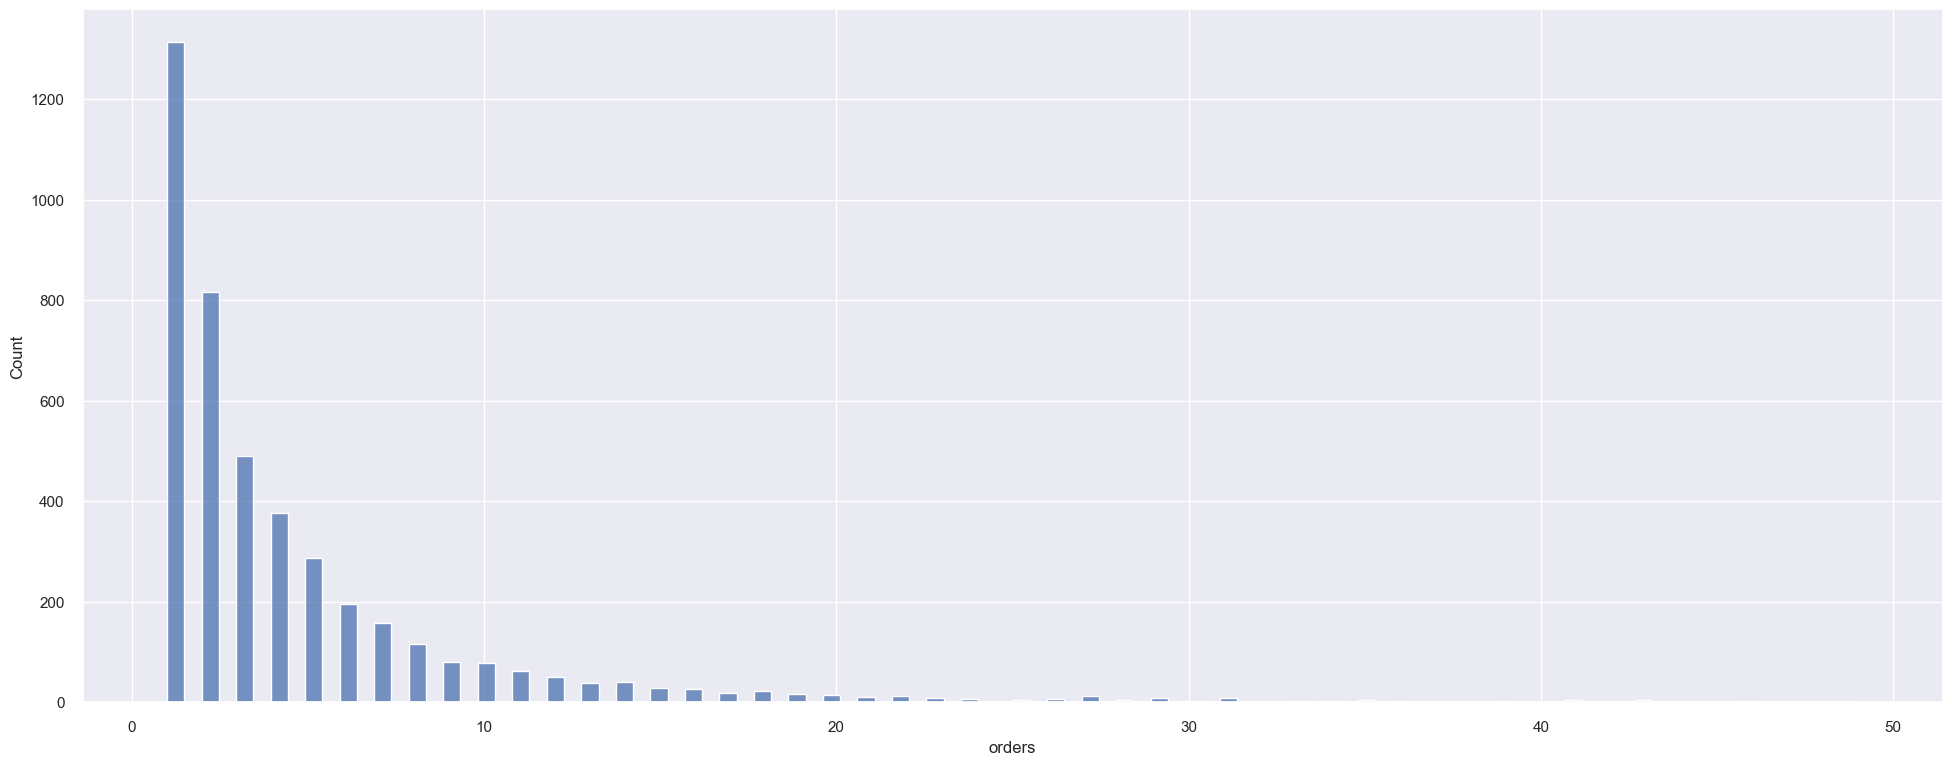

In [15]:
sns.histplot(orders_by_customer.query('orders < 50')['orders']);

In [16]:
print(df_missing.query('unit_price < 0')['invoice_no'].nunique())
print(df_missing.query('unit_price == 0')['invoice_no'].nunique())
print(df_missing.query('unit_price > 0')['invoice_no'].nunique())

2
2121
1610


Quando dividimos nosso dataset entre registros com identificação do cliente e sem identificação, pudemos notar as seguintes coisas:
 
- Existem 4372 clientes identificados na base, sendo que:

    - 1313 clientes fizeram somente uma compra

    - 3059 clientes fizeram mais de uma compra

</br>

- Exsitem 3710 compras que **não** é possível identificar o cliente. Dentro dessas compras temos que:

    - algumas transações são referentes a produtos de valores negativos.

    - algumas transações são de itens de valores nulo.
    
    - 1610 compras possuem apenas transações convencionais (não contém devoluções ou brindes).

Uma estratégia inicial para preencher a coluna `customer_id` seria verificar os valores de `invoice_no` que possuem o código do cliente e preencher com registros que não possuem código do cliente com base nele.

Mas podemos ver abaixo, nenhum registro com `customer_id` faltante possui um mesmo `invoice_no` com codigo do cliente preenchido.

In [17]:
invoice_no = df_missing['invoice_no'].unique()

df_not_missing.query('invoice_no in @invoice_no')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


Nesse ciclo, vamos assumir que cada compra com `customer_id` faltante seja realizada por um novo cliente, para o qual vamos gerar um código manualmente.

Como esse se trata de um problema de clusterização, não tem problema "criar novos clientes", pois nesse caso só estamos interessados em saber o comportamento comum entre clientes de um mesmo segmento, de modo que não precisamos identificar diretamente a pessoa real por trás dos códigos, mas sim identificar caracteristicas que levam os clientes a pertenceram a cada grupo.

In [18]:
# dataframe com os códigos de transação de compras sem identificação do cliente
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange( 19000, 19000 + df_backup.shape[0], 1 )

# merge with original
df1 = pd.merge( df1, df_backup, how='left', on='invoice_no')

# coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

# drop extra columns
df1 = df1.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [19]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [20]:
orders_by_customer = df1[['customer_id', 'invoice_no']].groupby('customer_id').nunique().reset_index().rename(columns={'invoice_no': 'orders'})

print('{} clientes fizeram somente uma compra'.format(orders_by_customer.query('orders == 1').shape[0]))
print('{} clientes fizeram mais de uma compra'.format(orders_by_customer.query('orders > 1').shape[0]))

5023 clientes fizeram somente uma compra
3059 clientes fizeram mais de uma compra


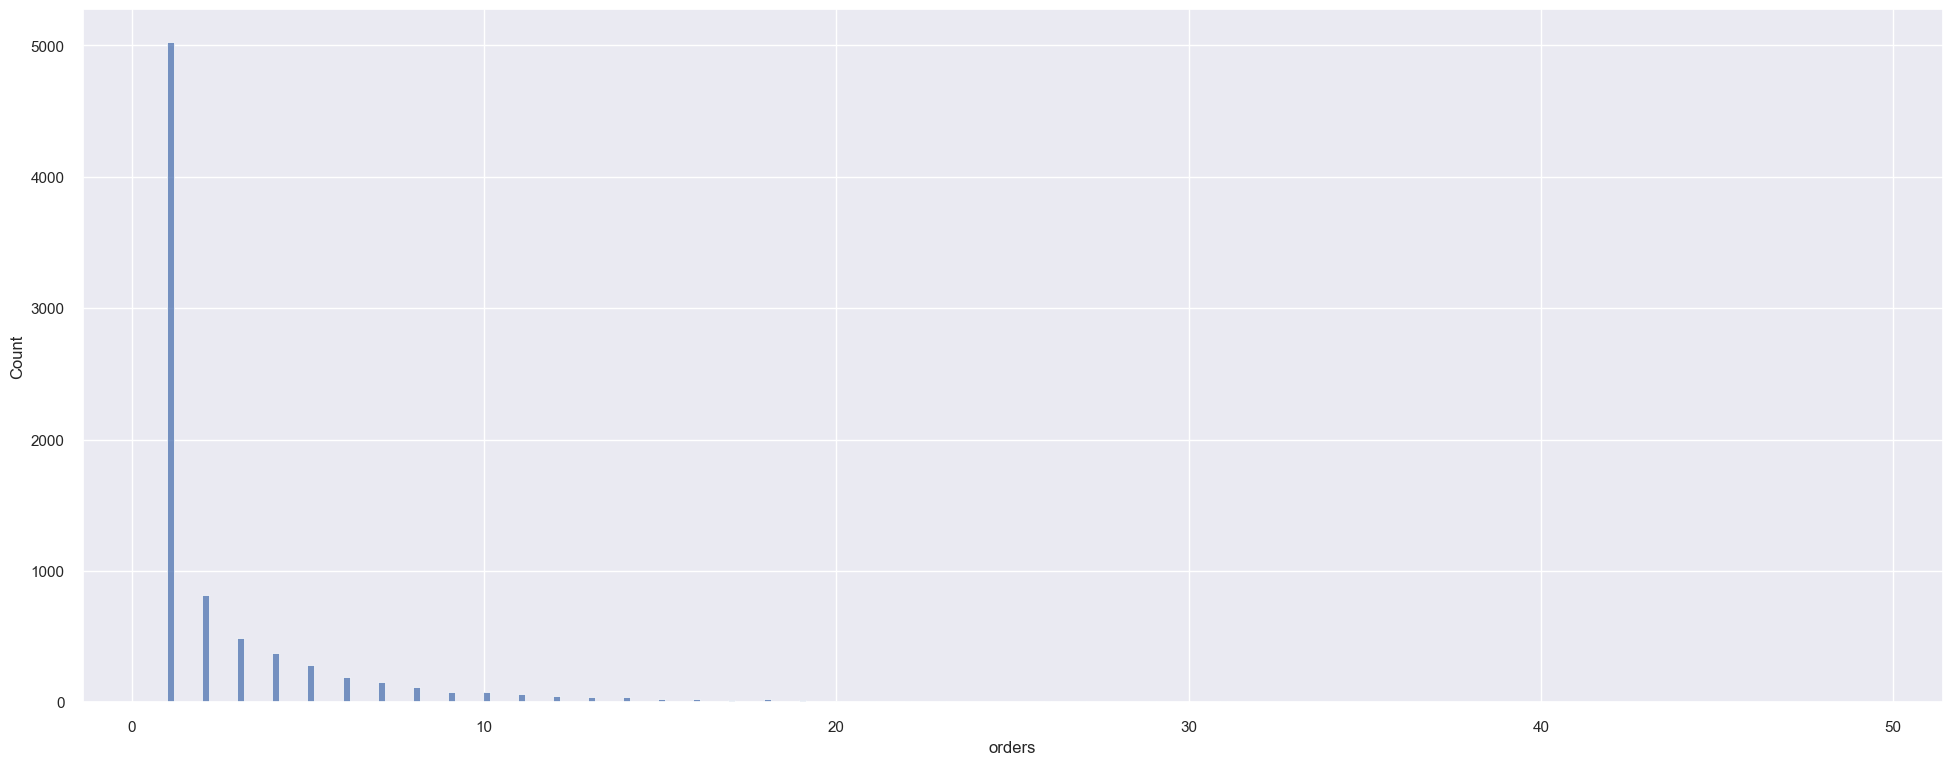

In [21]:
sns.histplot(orders_by_customer.query('orders < 50')['orders']);

### 1.6 Change dtypes

In [22]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
country          object
customer_id     float64
dtype: object

In [23]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [24]:
# converte para o tipo 'datetime64[ns]'
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y')

# converte para o tipo inteiro
df1['customer_id'] = df1['customer_id'].astype( int )

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [25]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

### 1.7 Descriptive Statistics

In [26]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### 1.7.1 Numerical Attributes

In [27]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply(np.mean) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median) ).T

# dispersion - desvio padrão, mínimo, máximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
desc_stats = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
desc_stats.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']

desc_stats

,attributes,min,max,range,mean,median,std,skew,kurt
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


Anteriormente o valor mínimo de `unit_price` era 0 e agora se tornou negativo, ou seja os 25% da base que trouxemos de volta na etapa replace NA introduziu essa "sujeira".

<font color='red'>**Itens para investigar**</font>

1. Quantidade negativa itens comprados pode indicar devoluções.

2. Preço unitário igual a zero ( pode ser um brinde ou promoção ).

#### 1.7.1 Categorical Attributes

As variáveis categóricas são as seguintes:

| Variável    | Descrição                              |
| ----------- | -------------------------------------- |
| invoice_no  | Identificador único de cada transação. |
| stock_code  | Código do item.                        |
| description | Nome do item.                          |
| country     | O nome do país que cliente reside.     |

In [28]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


Vamos investigar cada uma delas individualmente e ver como elas se comportam.

In [29]:
cat_attributes.dtypes

invoice_no     object
stock_code     object
description    object
country        object
dtype: object

#### `invoice_no`

A variável `invoice_no` possui o tipo `object`, isso indica a existência de caracteres não-numéricos em algum dos registros.

In [30]:
# recebe os indices em que 'invoice_no' possui uma letra
notint_index = cat_attributes['invoice_no'].apply( lambda x: bool(re.search(r'[a-zA-Z]', x)) )

# verifica a quantidade de pedidos 'especiais'
# (as repetições de invoice_no indicam a compra de diferentes itens dentro de uma mesma transação)
cat_attributes.loc[notint_index, 'invoice_no'].drop_duplicates().shape

(3839,)

Existem 3839 (*anteriormente 3654*) pedidos com algum com algum caractere não-numérico.

As letras em `invoice_no` indica algum registro que não se trata de um pedido não-convencional, como devoluções ou brindes. Filtrando a tabela pelos indices, vemos tais pedidos.

In [31]:
df1.loc[notint_index, :]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,United Kingdom,14397
541541,C581499,M,Manual,-1,2017-12-07,224.69,United Kingdom,15498
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,United Kingdom,15311
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,United Kingdom,17315


In [32]:
# quantidade de linhas com 'quantity' < 0
( df1.loc[notint_index, 'quantity'] < 0 ).sum()

9288

Vemos que todos os itens da tabela filtrada possuem `quantity` < 0, ou seja, muito provavelmente se tratam de devoluções ou o estorno da compra.

#### `stock_code`

Por se tratar do código do item não tem problema essa variável ser do tipo `object`.

In [33]:
df1.shape

(541909, 8)

In [34]:
# stock code
notint_index = cat_attributes['stock_code'].apply( lambda x: bool(re.search(r'[a-zA-Z]', x)) )

cat_attributes.loc[notint_index, 'stock_code']

0         85123A
2         84406B
3         84029G
4         84029E
45          POST
           ...  
541778    84997C
541809    85099C
541838    84993A
541844    85049A
541853    85049E
Name: stock_code, Length: 54873, dtype: object

Acima podemos identificar que existem valores de `stock_code` formados apenas por letras (POST). Assim como ocorreu com `invoice_no` no qual itens que possuiam algum caractere não-numérico identificava uma transação não-convencional (devolução), vamos verificar se o mesmo ocorre com `stock_code`, ou seja, se valores compostos apenas por letras são usados para indicar etapas da compra e não um item comprado propriamente dito.

In [35]:
# verifica quais registros o valor 'stock_code' é compostos apenas por letras
notint_index = cat_attributes['stock_code'].apply( lambda x: bool(re.search(r'^[a-zA-Z]+$', x)) )

# identifica as categorias
cat_attributes.loc[notint_index, 'stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [36]:
df1.query("stock_code in ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']").shape

(2759, 8)

Acima vemos que existem 2759 (*anteriormente 1774*) registros com `stock_code = ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK']` (surgiram novas categorias). Alguns desses valores não fica muito claro o significado como 'PADS' ou 'CRUK', mas podemos concluir que eles não se trata da compra de produtos.

In [37]:
df1.loc[notint_index, 'stock_code'].value_counts()

stock_code
POST         1256
DOT           710
M             571
D              77
S              63
AMAZONFEE      34
CRUK           16
DCGSSGIRL      13
DCGSSBOY       11
PADS            4
B               3
m               1
Name: count, dtype: int64

#### `description`

In [38]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


Nesse primeiro momento vamos descartar a coluna `description`, mas ela poderá ser usada em ciclo futuro. 

#### `country`

In [39]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [40]:
df1.drop_duplicates(subset=['customer_id'])['country'].value_counts()

country
United Kingdom          7587
Germany                   95
France                    90
EIRE                      44
Spain                     29
Belgium                   24
Switzerland               23
Portugal                  20
Hong Kong                 15
Italy                     15
Finland                   12
Norway                    10
Australia                  9
Netherlands                9
Austria                    9
Unspecified                9
Channel Islands            9
Sweden                     8
Denmark                    8
Japan                      8
Israel                     7
Cyprus                     7
Poland                     6
USA                        4
Canada                     4
Bahrain                    4
Greece                     4
United Arab Emirates       2
Malta                      2
Lithuania                  1
Iceland                    1
Saudi Arabia               1
Singapore                  1
Lebanon                    1
Brazil

Existem 2 valores em `country` que não representam países: "Unspecified" e "European Community". Esses valores serão descartados na etapa de Filtragem de Variáveis.

## <font color="blue">2.0 Filtragem de Variáveis </font>

In [41]:
df2 = df1.copy()

#### Explorando registros com `quantity` < 0

In [42]:
# quantity
df2.loc[df2['quantity'] < 0, :].sort_values(['invoice_date', 'customer_id']).head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
1973,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,2016-11-29,1.95,Germany,12472
1974,C536548,22242,5 HOOK HANGER MAGIC TOADSTOOL,-5,2016-11-29,1.65,Germany,12472
1975,C536548,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1,2016-11-29,2.95,Germany,12472
1976,C536548,22892,SET OF SALT AND PEPPER TOADSTOOLS,-7,2016-11-29,1.25,Germany,12472
1977,C536548,22654,DELUXE SEWING KIT,-1,2016-11-29,5.95,Germany,12472


In [43]:
# o cliente 12472 fez 5 devoluções nos últimos 5 registros
df2.loc[df2['customer_id'] == 12472, :].sort_values(['invoice_date']).tail()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
448612,C575064,22467,GUMBALL COAT RACK,-8,2017-11-06,2.55,Germany,12472
448613,C575064,22212,FOUR HOOK WHITE LOVEBIRDS,-1,2017-11-06,2.10,Germany,12472
448614,C575064,21669,BLUE STRIPE CERAMIC DRAWER KNOB,-1,2017-11-06,1.45,Germany,12472
448615,C575064,20749,ASSORTED COLOUR MINI CASES,-1,2017-11-06,7.95,Germany,12472
451761,C575223,22973,CHILDREN'S CIRCUS PARADE MUG,-1,2017-11-07,1.65,Germany,12472


In [44]:
# filtando pelo stock_code 22467 'GUMBALL COAT RACK' vemos que ele pediu esse item múltiplas vezes, mas realizou
# algumas devoluções, possivelment devido a algum defeito ou considerou que comprou em quantidade excessiva
# e resolveu devolver algumas unidades.
df2.loc[(df2['customer_id'] == 12472) & (df2['stock_code'] == '22467'), :].sort_values(['invoice_date'])

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
9436,537201,22467,GUMBALL COAT RACK,12,2016-12-03,2.55,Germany,12472
71835,542215,22467,GUMBALL COAT RACK,18,2017-01-24,2.55,Germany,12472
83743,C543347,22467,GUMBALL COAT RACK,-6,2017-02-05,2.55,Germany,12472
121984,546843,22467,GUMBALL COAT RACK,36,2017-03-15,2.10,Germany,12472
139808,C548356,22467,GUMBALL COAT RACK,-9,2017-03-28,2.55,Germany,12472
224865,556578,22467,GUMBALL COAT RACK,6,2017-06-11,2.55,Germany,12472
253966,C559253,22467,GUMBALL COAT RACK,-2,2017-07-05,2.55,Germany,12472
276308,561037,22467,GUMBALL COAT RACK,6,2017-07-22,2.55,Germany,12472
406692,571824,22467,GUMBALL COAT RACK,36,2017-10-17,2.10,Germany,12472
448612,C575064,22467,GUMBALL COAT RACK,-8,2017-11-06,2.55,Germany,12472


#### Filtragem

In [45]:
# ==== Numerical Attributes =========
# unit price > 0.04 - elimina possíveis brindes
df2 = df2.query('unit_price > 0.04')

# ==== Categorical attributes =======
# stock code != ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK']
df2 = df2.query("stock_code not in ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK']")

# description
df2 = df2.drop(columns=['description'], axis=1)

# country - elimina falsos paises
df2 = df2.query("country not in ['Unspecified', 'European Community']")


# dividindo o dataset entre compras e devoluções
df2_returns  = df2.query('quantity < 0')
df2_purchases = df2.query('quantity > 0')

In [46]:
df2_returns.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548


In [47]:
df2_purchases.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850


In [48]:
print(f'Registros de compra:\t {df2_purchases.shape[0]}')
print(f'Registros de devolução:\t {df2_returns.shape[0]}')

Registros de compra:	 527348
Registros de devolução:	 8729


## <font color="blue">3.0 Feature Engineering </font>

In [49]:
df3 = df2.copy()

In [50]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850


Ideais de features para o futuro:

- Moving Average - 7d, 14, 30d

- Quantidade de compras por mês, antes e depois do dia 15

- Average Financial

- Basket Size * Price - Quantidade de preços por cesta

### 3.1 Feature Creation

In [51]:
# data reference
df_ref = df3[['customer_id']].drop_duplicates(ignore_index=True)

df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


#### 3.1.1 Gross Revenue

In [52]:
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases['quantity'] * df2_purchases['unit_price']

df_monetary = ( df2_purchases[['customer_id', 'gross_revenue']]
                    .groupby('customer_id')
                    .sum()
                    .reset_index()
            )

df_ref = pd.merge(left=df_ref, right=df_monetary, how='left', on='customer_id')

df_ref.isna().sum()


customer_id       0
gross_revenue    91
dtype: int64

#### 3.1.2 Recency - Days from lastest purchase on the dataset

In [53]:
df_recency = ( df2_purchases[['customer_id', 'invoice_date']]
                    .groupby('customer_id')
                    .max()
                    .reset_index()
            )

df_recency['recency_days'] = ( df2_purchases['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']]

df_ref = pd.merge(left=df_ref, right=df_recency, how='left', on='customer_id')

df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

#### 3.1.3 Number of orders

In [54]:
df_frequency = ( df2_purchases[['customer_id', 'invoice_no']]
                    .drop_duplicates()
                    .groupby('customer_id')
                    .count()
                    .reset_index()
            ).rename(columns={'invoice_no': 'orders'})


df_ref = pd.merge(left=df_ref, right=df_frequency, how='left', on='customer_id')

df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
orders           91
dtype: int64

#### 3.1.4 Amount of items bought

In [55]:
df_items = ( df2_purchases[['customer_id', 'quantity']]
                    .groupby('customer_id')
                    .sum()
                    .reset_index()
        ).rename(columns={'quantity': 'total_items'})


df_ref = pd.merge(left=df_ref, right=df_items, how='left', on='customer_id')

df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
orders           91
total_items      91
dtype: int64

#### 3.1.5 Amount of products bought

In [56]:
df_products = ( df2_purchases[['customer_id', 'stock_code']]
                    .groupby('customer_id')
                    .count()
                    .reset_index()
        ).rename(columns={'stock_code': 'total_products'})


df_ref = pd.merge(left=df_ref, right=df_products, how='left', on='customer_id')

df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
orders            91
total_items       91
total_products    91
dtype: int64

#### 3.1.6 Average Ticket Value

In [57]:
df_avg_ticket = ( df2_purchases[['customer_id', 'gross_revenue']]
                   .groupby('customer_id')
                   .mean()
                   .reset_index()
            ).rename(columns={'gross_revenue': 'avg_ticket'})

df_avg_ticket['avg_ticket'] = np.round( df_avg_ticket['avg_ticket'], 2 )


df_ref = pd.merge(left=df_ref, right=df_avg_ticket, how='left', on='customer_id')

df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
orders            91
total_items       91
total_products    91
avg_ticket        91
dtype: int64

#### 3.1.7 Average time between orders

In [58]:
df_aux = df2_purchases[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'], ascending=[True, True])

df_aux['next_customer_id']  = df_aux['customer_id'].shift(periods=-1)
df_aux['next_invoice_date'] = df_aux['invoice_date'].shift(periods=-1)

df_aux.head()

,customer_id,invoice_date,next_customer_id,next_invoice_date
61619,12346,2017-01-16,12347.0,2016-12-05
14938,12347,2016-12-05,12347.0,2017-01-24
72246,12347,2017-01-24,12347.0,2017-04-05
148285,12347,2017-04-05,12347.0,2017-06-07
220572,12347,2017-06-07,12347.0,2017-07-31


In [59]:
df_aux['time_delta'] = df_aux.apply( lambda x: (x['next_invoice_date'] - x['invoice_date']).days if x['customer_id'] == x['next_customer_id'] 
                                                                                                 else 
                                                np.nan, 
                                    axis=1
                )

df_aux.head(10)

,customer_id,invoice_date,next_customer_id,next_invoice_date,time_delta
61619,12346,2017-01-16,12347.0,2016-12-05,NaN
14938,12347,2016-12-05,12347.0,2017-01-24,50.0
72246,12347,2017-01-24,12347.0,2017-04-05,71.0
148285,12347,2017-04-05,12347.0,2017-06-07,63.0
220572,12347,2017-06-07,12347.0,2017-07-31,54.0
286621,12347,2017-07-31,12347.0,2017-10-29,90.0
428957,12347,2017-10-29,12347.0,2017-12-05,37.0
535004,12347,2017-12-05,12348.0,2016-12-14,NaN
34083,12348,2016-12-14,12348.0,2017-01-23,40.0
70051,12348,2017-01-23,12348.0,2017-04-03,70.0


In [60]:
df_aux = df_aux.drop(['invoice_date', 'next_invoice_date', 'next_customer_id'], axis=1).dropna()

df_aux = ( df_aux[['customer_id', 'time_delta']]
            .groupby('customer_id')
            .mean()
            .reset_index()
            
    ).rename(columns={'time_delta':'avg_days_orders'})

df_aux.head()

,customer_id,avg_days_orders
0,12347,60.833333
1,12348,94.333333
2,12352,43.333333
3,12356,151.500000
4,12358,149.000000


In [61]:
df_ref = pd.merge(df_ref, df_aux, on='customer_id', how='left')

df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
orders               91
total_items          91
total_products       91
avg_ticket           91
avg_days_orders    3013
dtype: int64

#### 3.1.8 Frequency Purchase

In [62]:
df_aux =  ( df2_purchases[['customer_id', 'invoice_no', 'invoice_date']]
              .drop_duplicates()
              .groupby('customer_id')
              .agg(
                    max_date=('invoice_date', 'max'),
                    min_date=('invoice_date', 'min'),
                    orders=('invoice_date', 'count'),
                  )
              .reset_index()
        )

df_aux['days'] = ( df_aux['max_date'] - df_aux['min_date'] ).dt.days

df_aux['frequency'] = df_aux[['orders', 'days']].apply( lambda x: x['orders'] / x['days'] if x['days'] != 0 else 0, axis=1)

df_aux.head()

,customer_id,max_date,min_date,orders,days,frequency
0,12346,2017-01-16,2017-01-16,1,0,0.000000
1,12347,2017-12-05,2016-12-05,7,365,0.019178
2,12348,2017-09-23,2016-12-14,4,283,0.014134
3,12349,2017-11-19,2017-11-19,1,0,0.000000
4,12350,2017-01-31,2017-01-31,1,0,0.000000


In [63]:
df_aux.sort_values('frequency', ascending=False)

,customer_id,max_date,min_date,orders,days,frequency
4008,17850,2016-11-30,2016-11-29,34,1,34.0
4220,18139,2017-11-20,2017-11-19,6,1,6.0
1979,15060,2017-11-29,2017-11-28,4,1,4.0
2111,15230,2017-04-12,2017-04-11,2,1,2.0
2461,15700,2017-06-18,2017-06-17,2,1,2.0
...,...,...,...,...,...,...
3543,17201,2017-10-15,2017-10-15,1,0,0.0
3528,17176,2017-05-20,2017-05-20,1,0,0.0
3534,17187,2017-04-25,2017-04-25,1,0,0.0
3520,17165,2017-02-26,2017-02-26,1,0,0.0


In [64]:
df_aux = df_aux[['customer_id', 'frequency']]

df_ref = pd.merge(df_ref, df_aux, on='customer_id', how='left')

df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
orders               91
total_items          91
total_products       91
avg_ticket           91
avg_days_orders    3013
frequency            91
dtype: int64

#### 3.1.9 Number of returns

In [65]:
df_aux = ( df2_returns[['customer_id', 'quantity']]
            .groupby('customer_id')
            .sum()
            .reset_index()
            .rename(columns={'quantity': 'items_returned'})
    )

df_aux['items_returned'] = -1 * df_aux['items_returned']

df_ref = pd.merge(left=df_ref, right=df_aux, on='customer_id', how='left')

df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
orders               91
total_items          91
total_products       91
avg_ticket           91
avg_days_orders    3013
frequency            91
items_returned     4191
dtype: int64

In [66]:
df_ref.loc[ df_ref['items_returned'].isna(), 'items_returned' ] = 0

df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
orders               91
total_items          91
total_products       91
avg_ticket           91
avg_days_orders    3013
frequency            91
items_returned        0
dtype: int64

#### 3.1.10 Basket Size - quantidade de items por compra

In [67]:
df_aux = ( df2_purchases[['customer_id', 'invoice_no', 'quantity']]
            .groupby('customer_id')
            .agg(
                    orders=('invoice_no', 'nunique'), 
                    items=('quantity', 'sum')
                )
            .reset_index()
    )

df_aux['avg_basket_size'] = df_aux['items'] / df_aux['orders']

df_aux.head()

,customer_id,orders,items,avg_basket_size
0,12346,1,74215,74215.000000
1,12347,7,2458,351.142857
2,12348,4,2332,583.000000
3,12349,1,630,630.000000
4,12350,1,196,196.000000


In [68]:
df_aux = df_aux[['customer_id', 'avg_basket_size']]

df_ref = pd.merge(left=df_ref, right=df_aux, on='customer_id', how='left')

df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
orders               91
total_items          91
total_products       91
avg_ticket           91
avg_days_orders    3013
frequency            91
items_returned        0
avg_basket_size      91
dtype: int64

#### 3.1.11 Unique products per Order

In [69]:
df_aux = ( df2_purchases[['customer_id', 'invoice_no','stock_code']]
            .groupby('customer_id')
            .agg(
                    orders=('invoice_no', 'nunique'), 
                    products=('stock_code', 'count')
                )
            .reset_index()
    )

df_aux['avg_products_order'] = df_aux['products'] / df_aux['orders']


df_aux = df_aux[['customer_id', 'avg_products_order']]

df_ref = pd.merge(left=df_ref, right=df_aux, on='customer_id', how='left')

df_ref.isna().sum()

customer_id              0
gross_revenue           91
recency_days            91
orders                  91
total_items             91
total_products          91
avg_ticket              91
avg_days_orders       3013
frequency               91
items_returned           0
avg_basket_size         91
avg_products_order      91
dtype: int64

### 3.2 Final Result

In [70]:
df_ref.head()

,customer_id,gross_revenue,recency_days,orders,total_items,total_products,avg_ticket,avg_days_orders,frequency,items_returned,avg_basket_size,avg_products_order
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.15,1.000000,34.000000,40.0,50.970588,8.735294
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.90,52.833333,0.028391,35.0,154.444444,19.000000
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.90,26.500000,0.040431,50.0,335.200000,15.466667
3,13748,948.25,95.0,5.0,439.0,28.0,33.87,92.666667,0.017986,0.0,87.800000,5.600000
4,15100,876.00,333.0,3.0,80.0,3.0,292.00,20.000000,0.075000,22.0,26.666667,1.000000


In [71]:
df_ref.isna().sum()

customer_id              0
gross_revenue           91
recency_days            91
orders                  91
total_items             91
total_products          91
avg_ticket              91
avg_days_orders       3013
frequency               91
items_returned           0
avg_basket_size         91
avg_products_order      91
dtype: int64

## <font color="blue">4.0 Exploratory Data Analysis </font>

A análise exploratória de dados possui duas funções principais:

- Confirmar ou refutar achismos da equipe de negócios.
   
    - Os membros da equipe listam hipóteses que eles acham que são verdadeiras sobre o negócio ou dados.
   
    - Através de gráficos e outras análises verificamos a validade dessas hipóteses.

</br>

- Estudar o espaço de dados.

    - Verificar relacões entre as variáveis.

    - Permite identificar a disposição dos dados nesse espaço, e nos ajuda, caso necessário, a fazer mudança para um espaço onde os dados sejam mais organizados.

In [72]:
df4 = df_ref.dropna().copy()
df4.isna().sum()

customer_id           0
gross_revenue         0
recency_days          0
orders                0
total_items           0
total_products        0
avg_ticket            0
avg_days_orders       0
frequency             0
items_returned        0
avg_basket_size       0
avg_products_order    0
dtype: int64

In [73]:
df4.head()

,customer_id,gross_revenue,recency_days,orders,total_items,total_products,avg_ticket,avg_days_orders,frequency,items_returned,avg_basket_size,avg_products_order
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.15,1.000000,34.000000,40.0,50.970588,8.735294
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.90,52.833333,0.028391,35.0,154.444444,19.000000
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.90,26.500000,0.040431,50.0,335.200000,15.466667
3,13748,948.25,95.0,5.0,439.0,28.0,33.87,92.666667,0.017986,0.0,87.800000,5.600000
4,15100,876.00,333.0,3.0,80.0,3.0,292.00,20.000000,0.075000,22.0,26.666667,1.000000


### 4.1 Univariate Analysis

Em um problema de clusterização queremos que os clusters formados possuam as seguintes qualidades.

1. Clusters Coesos - os elementos devem estar próximos uns aos outros.

2. Clusters Separados

</br>

> **O tipo de cluster varia de acordo com o tipo de negócio.**

Nesse projeto em questão estamos trabalhando com um conjunto de dados de um e-commerce. No geral, e-commerces possuem produtos em faixas de preços gradativas, de modo a garantir que ele consiga atrair clientes em diferentes níveis socio-economicos. Se observarmos o histograma de `gross_revenue` vemos que a ampla maioria dos clientes, mais de 90%, ficou no primeira barra do histograma, ou seja, são clientes que individualmente tiveram pouco impacto no faturamento. Se plotássemos esses pontos em um gráfico, veríamos que essa variável concentra os pontos em uma região relativamente pequena do espaço, o que dificultaria a priori a separação dos clusters. O mesmo argumento pode ser feito com outras variáveis relevantes a um modelo de e-commerce.

Em modelos de e-commerce é dificil criar clusters separados no espaço original de dados, uma vez que os preços aplicados estão em faixas quase que "contínuas".

Quandos queremos estudar a qualidade de uma variável em criar bons clusters devemos nos atentar as seguintes métricas.

1. Min, Max e Range.

2. Média e Mediana.

3. Desvio Padrão e Variância.

4. Coeficiente de Variação.

5. Distribuição

In [76]:
# report = sv.analyze(df4)

# report.show_html('output_eda.html')

In [77]:
df4.query('customer_id == 14646')

,customer_id,gross_revenue,recency_days,orders,total_items,total_products,avg_ticket,avg_days_orders,frequency,items_returned,avg_basket_size,avg_products_order
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.5,8.022727,0.203966,288.0,2733.944444,28.611111


In [79]:
df4.query('total_products == 7837')

,customer_id,gross_revenue,recency_days,orders,total_items,total_products,avg_ticket,avg_days_orders,frequency,items_returned,avg_basket_size,avg_products_order
68,17841,40959.72,1.0,124.0,22853.0,7837.0,5.23,3.351351,0.333333,203.0,184.298387,63.201613


In [82]:
df4.sort_values(by='avg_ticket', ascending=False).head()

,customer_id,gross_revenue,recency_days,orders,total_items,total_products,avg_ticket,avg_days_orders,frequency,items_returned,avg_basket_size,avg_products_order
3338,16446,168472.50,0.0,2.0,80997.0,3.0,56157.50,205.0,0.009756,80995.0,40498.500000,1.500000
1262,15749,44534.30,235.0,3.0,18028.0,10.0,4453.43,97.0,0.030928,9014.0,6009.333333,3.333333
1136,16532,6748.80,17.0,3.0,2016.0,4.0,1687.20,160.5,0.009346,0.0,672.000000,1.333333
601,12755,3811.95,280.0,2.0,1491.0,4.0,952.99,85.0,0.023529,624.0,745.500000,2.000000
3780,12798,6977.04,10.0,3.0,5256.0,8.0,872.13,80.0,0.018750,0.0,1752.000000,2.666667


In [83]:
df3.query('customer_id == 16446')

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
194354,553573,22980,1,2017-05-16,1.65,United Kingdom,16446
194355,553573,22982,1,2017-05-16,1.25,United Kingdom,16446
540421,581483,23843,80995,2017-12-07,2.08,United Kingdom,16446
540422,C581484,23843,-80995,2017-12-07,2.08,United Kingdom,16446


### 4.2 Bivariate Analysis

Em problemas supervisionados fazemos a análise bivariada entre as features do modelo com a variável resposta para estimar o impacto que cada feature possui, em outras palavras, estamos interessados em visualizar o comportamento / variação da variável resposta quando variamos cada uma das features individualmente. <font color='red'>Devemos nos lembrar, no entanto, que **não** podemos inferir uma relação de causa e efeito a partir desse tipo de análise.</font>

Em problemas não-supervisionados não temos a disposição uma variável resposta. Em problemas de clusterização, a etapa de análise bivariada se foca em tentar descobrir pares de feature que ao ser combinadas forneçam uma nova feature que permita separação dos clusteres.

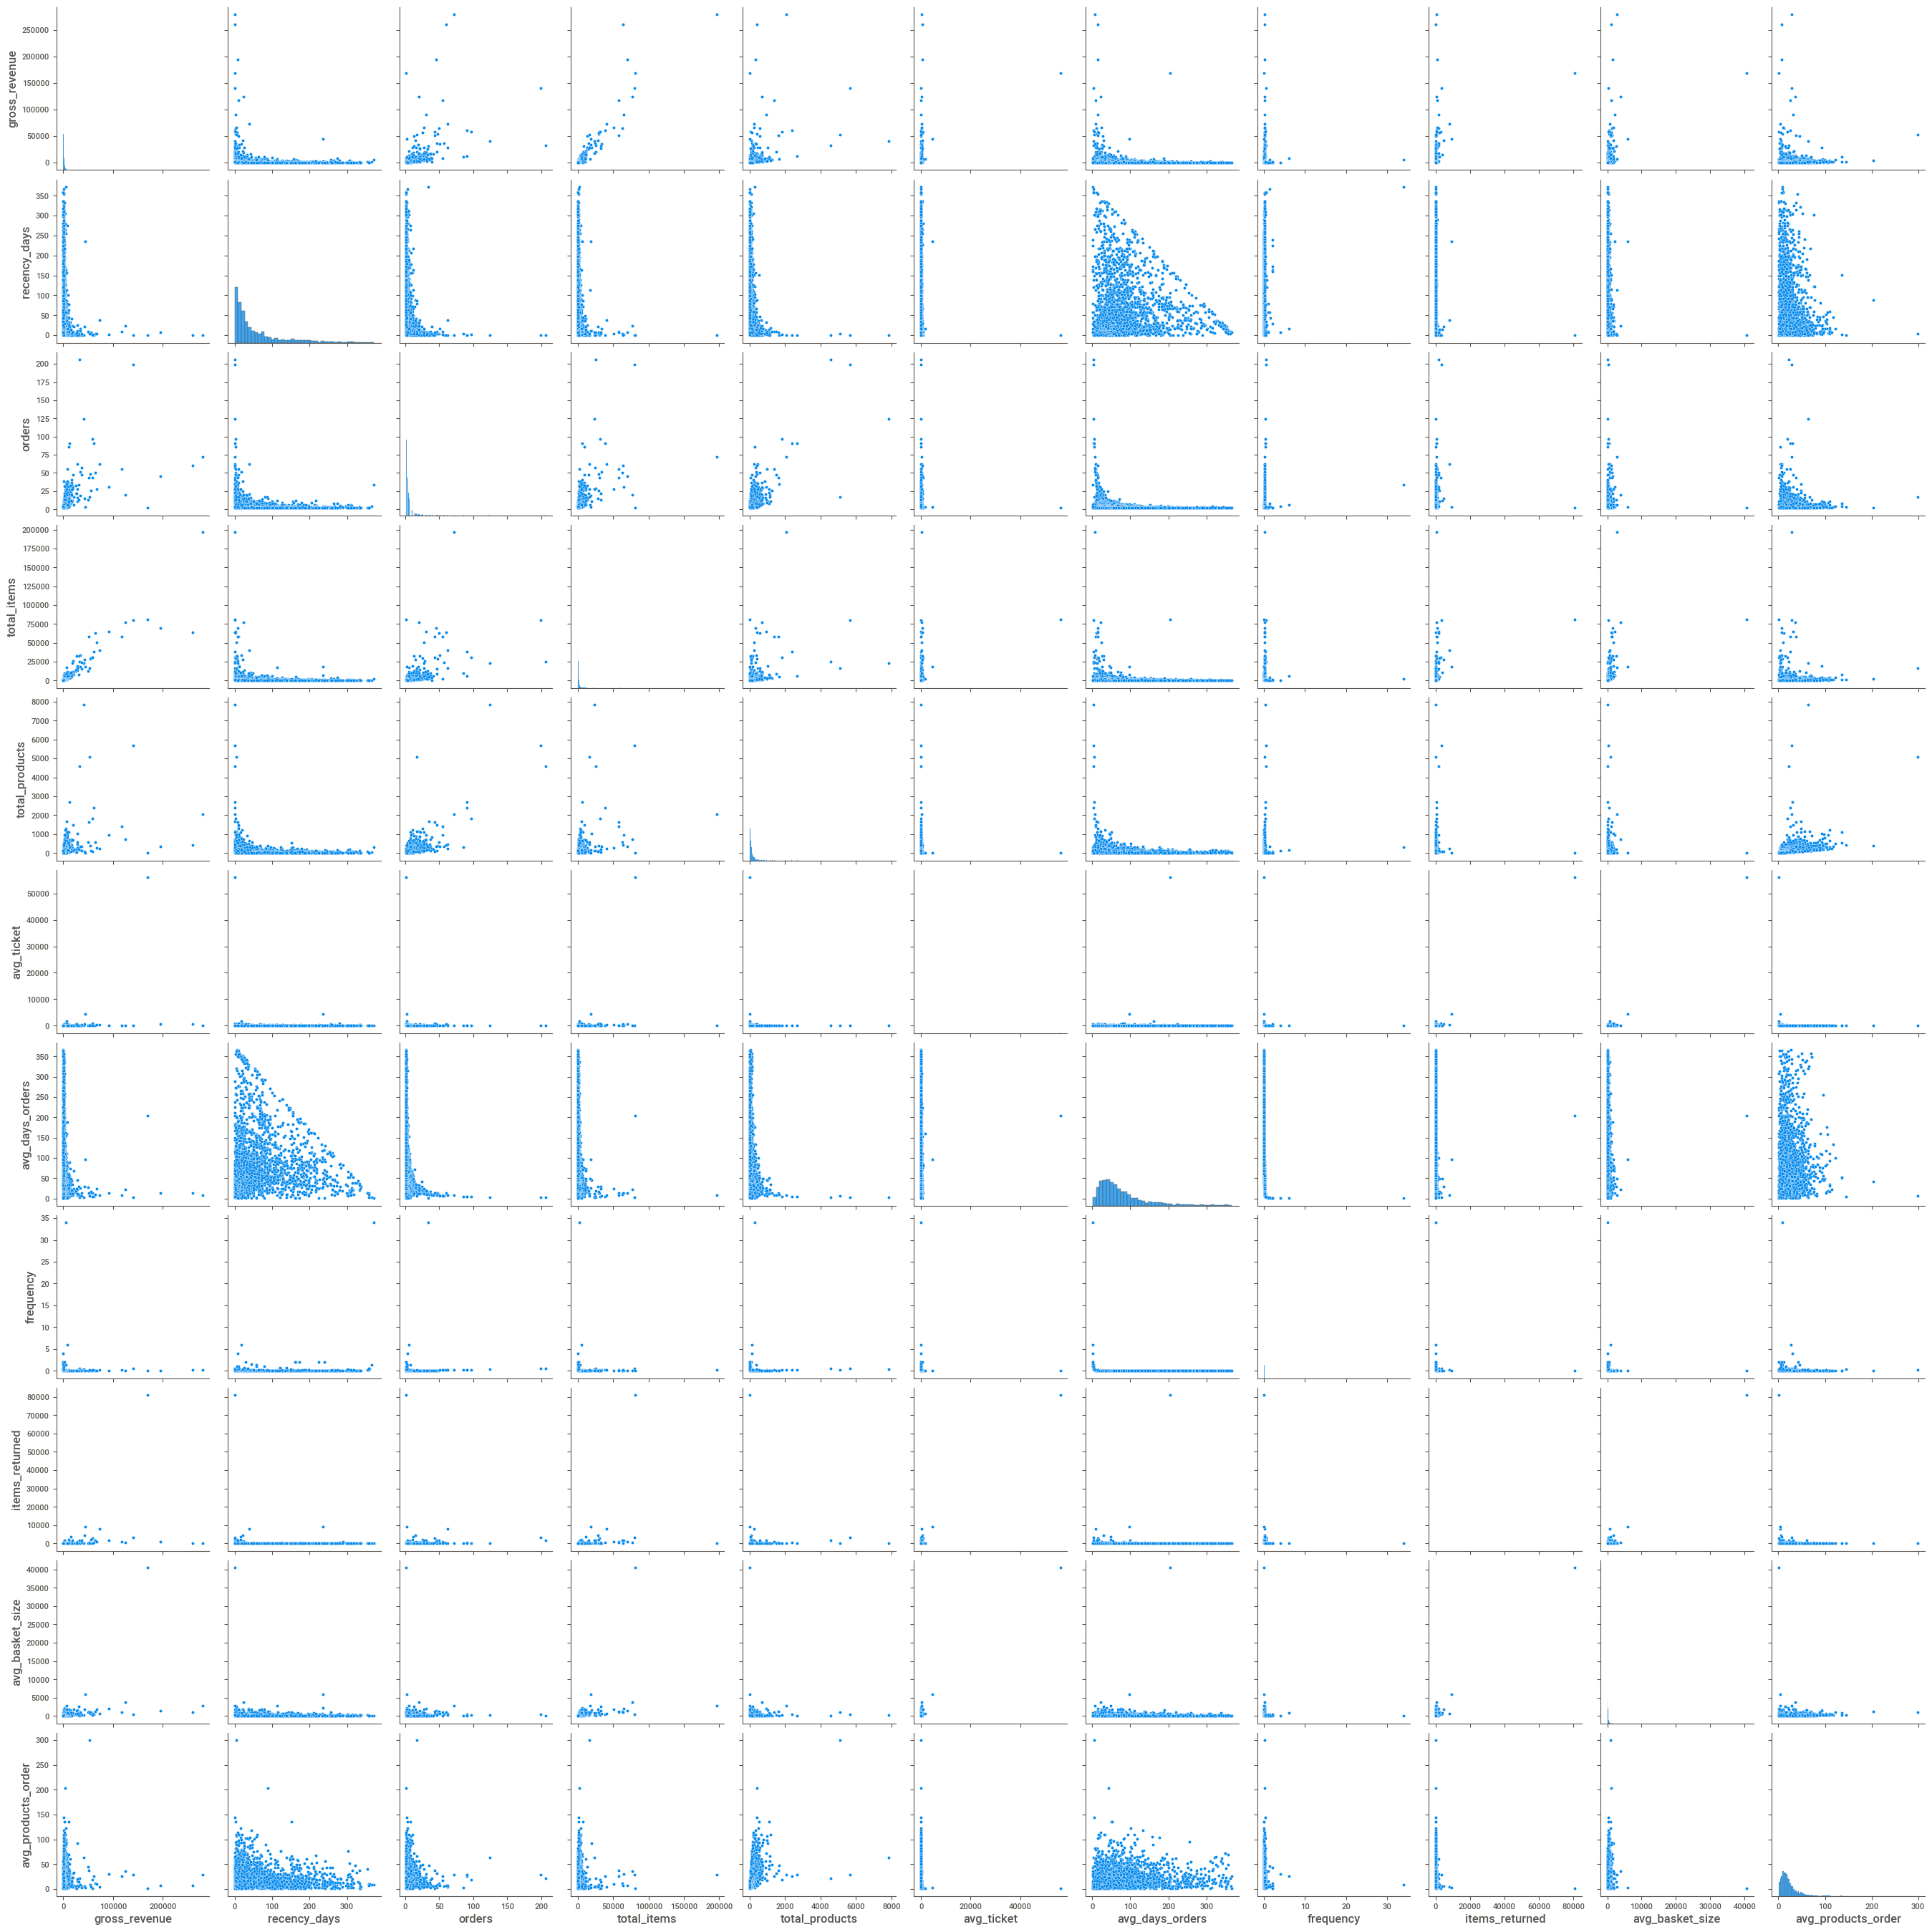

In [91]:
# fig = plt.figure(figsize=(25, 15))

# sns.pairplot(df4.drop(columns=['customer_id'], axis=1));

Image.open('../img/bivariate_analysis.png')

## <font color="blue">5.0 Data Preparation </font>

In [64]:
df5 = df4.copy()

In [65]:
df5.head()

,customer_id,gross_revenue,recency_days,orders,quantity,avg_ticket,avg_days_orders
0,17850,5391.21,372.0,34.0,1733.0,18.15,71.000000
1,13047,3232.59,56.0,9.0,1390.0,18.90,29.727273
2,12583,6705.38,2.0,15.0,5028.0,28.90,24.733333
3,13748,948.25,95.0,5.0,439.0,33.87,139.000000
4,15100,876.00,333.0,3.0,80.0,292.00,10.750000


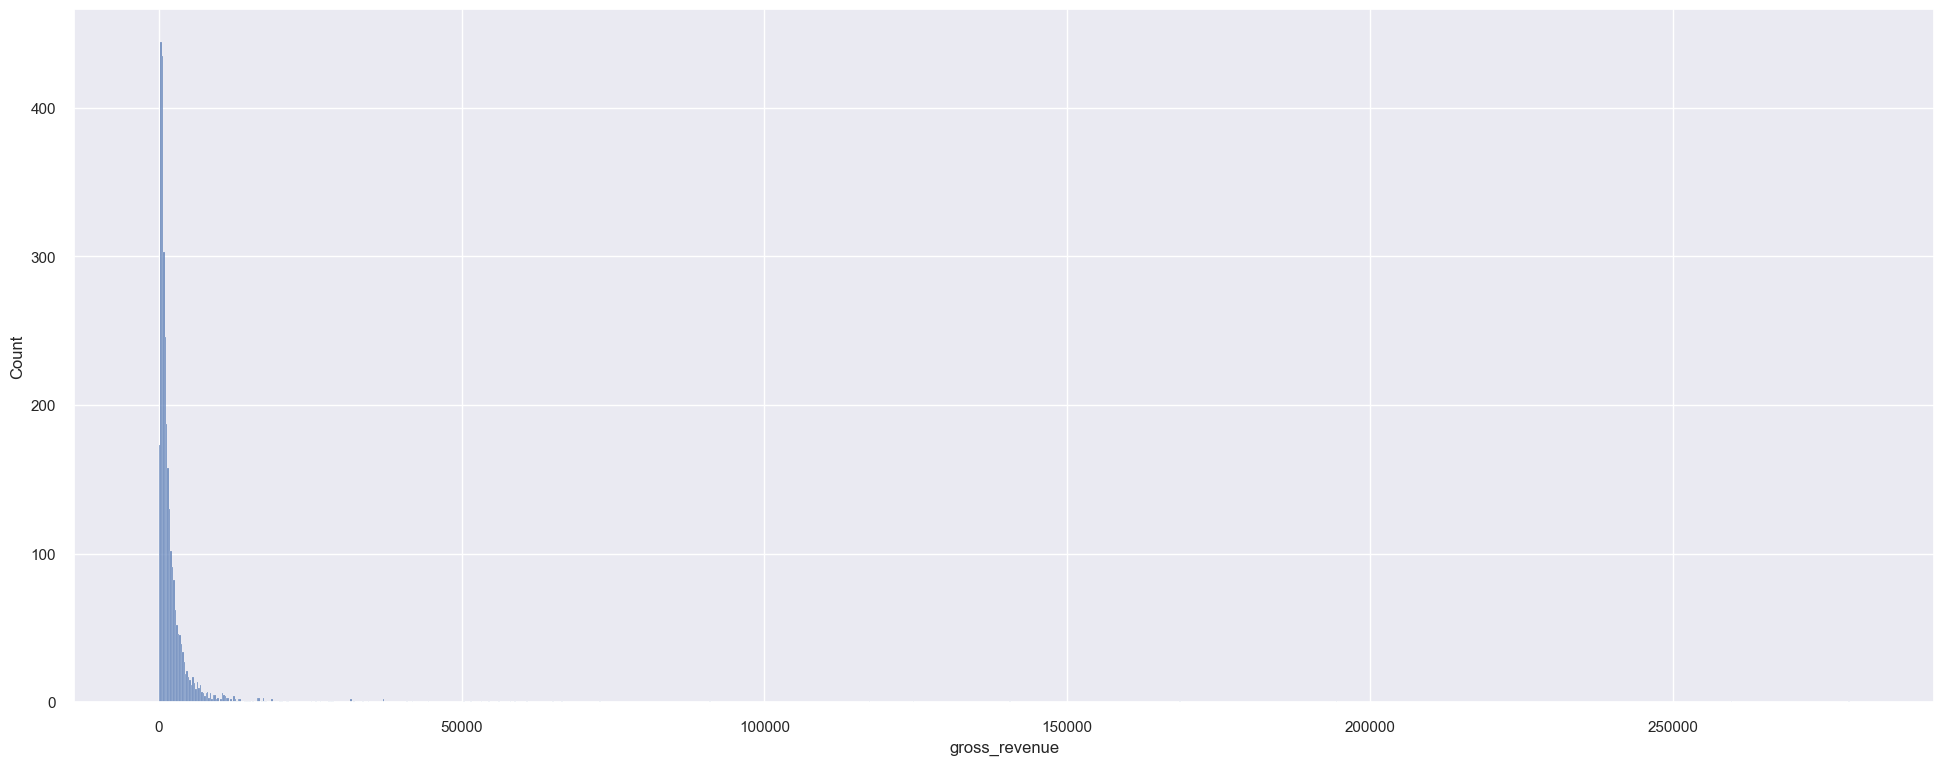

In [66]:
sns.histplot(df5['gross_revenue']);

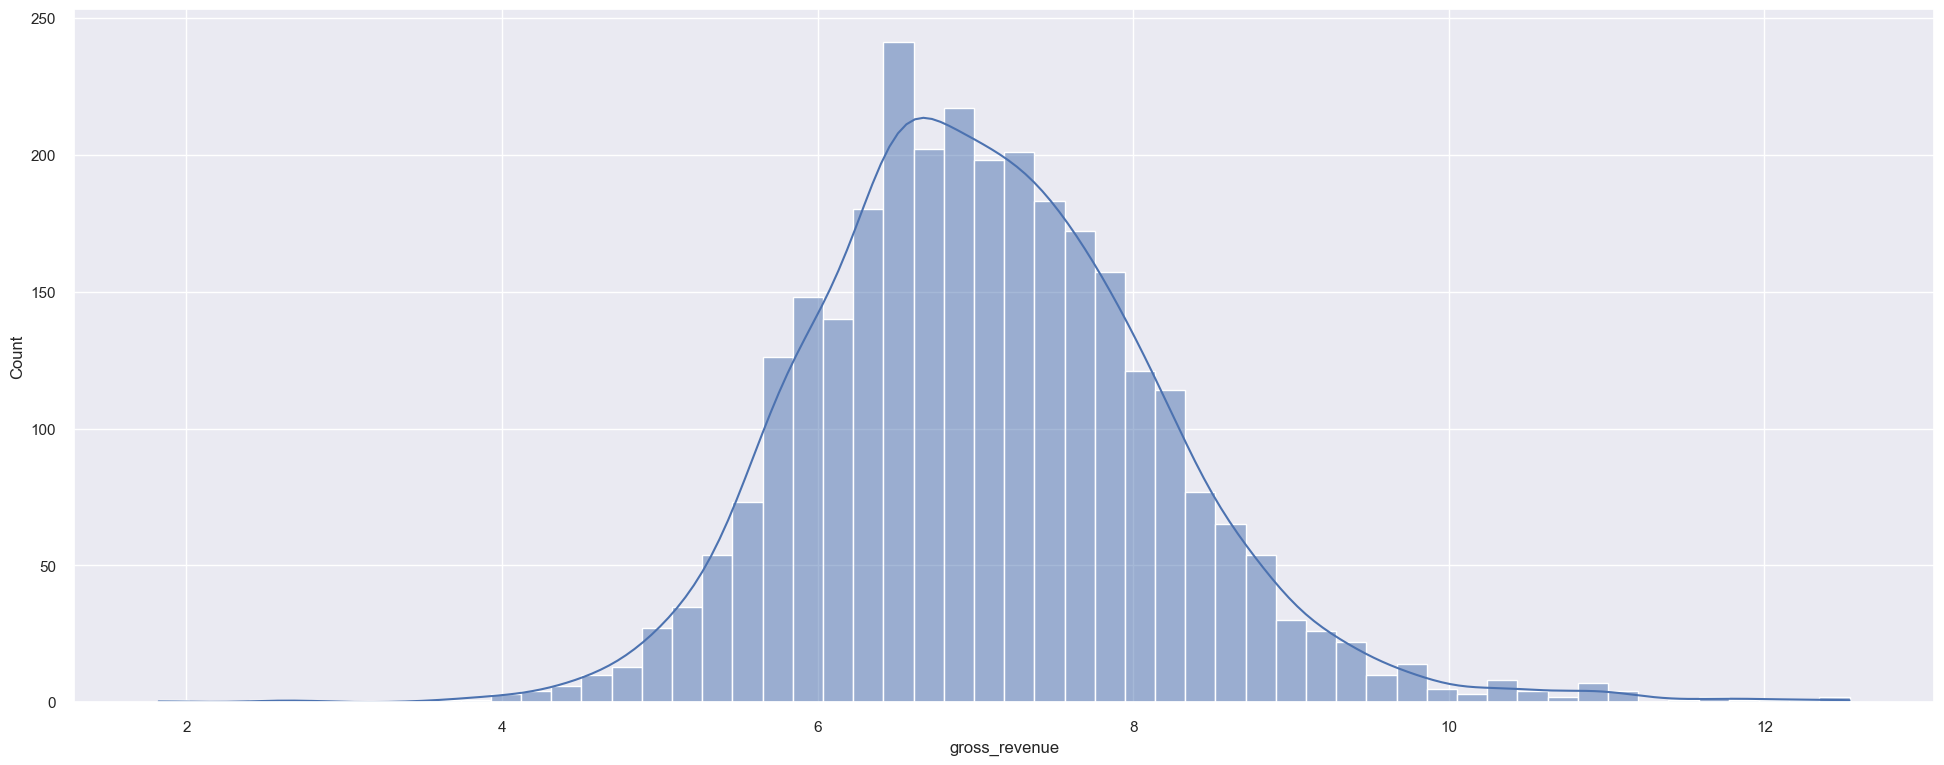

In [67]:
sns.histplot(np.log(df5['gross_revenue']), kde=True);

In [68]:
ss = pp.StandardScaler()

df5['gross_revenue'] = ss.fit_transform( df5[['gross_revenue']] )
df5['recency_days']  = ss.fit_transform( df5[['recency_days']] )
df5['frequency']     = ss.fit_transform( df5[['frequency']] )
df5['avg_ticket']    = ss.fit_transform( df5[['avg_ticket']] )
# df5['returns']       = ss.fit_transform( df5[['returns']] )

KeyError: "None of [Index(['frequency'], dtype='object')] are in the [columns]"

/home/gustavo/.pyenv/versions/3.11.4/envs/ds-clusterizacao/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


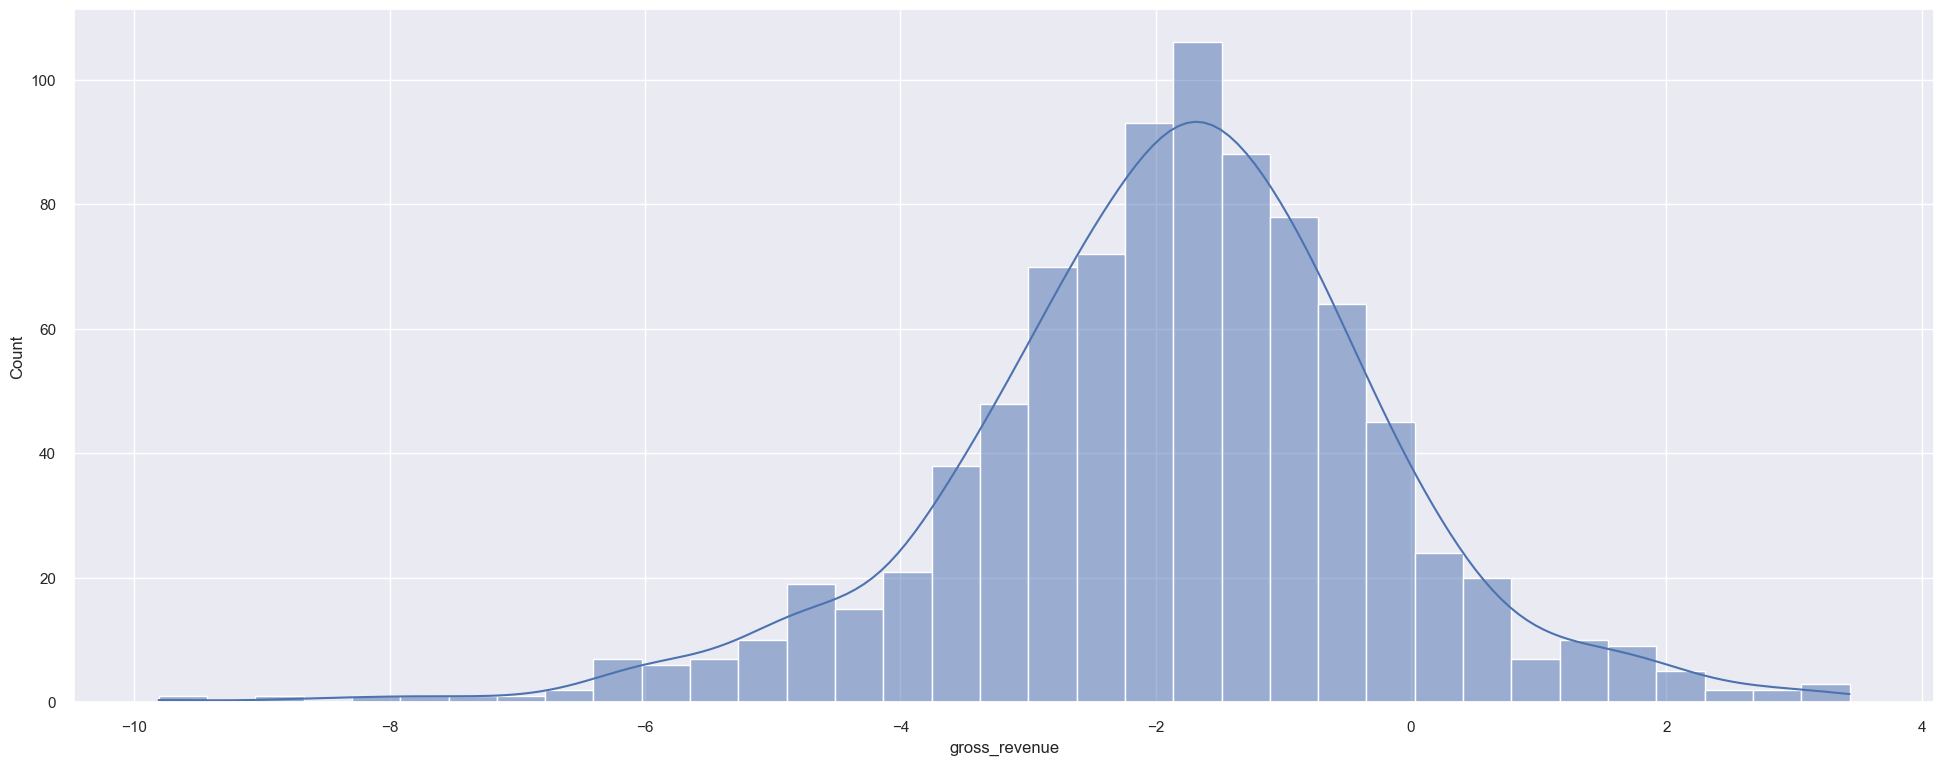

In [ ]:
sns.histplot(np.log(df5['gross_revenue']), kde=True);

In [ ]:
df5.head()

,customer_id,gross_revenue,recency_days,frequency,avg_ticket
0,17850,0.377193,2.791512,3.889210,-0.033940
1,13047,0.135388,-0.361004,0.620928,-0.033430
2,12583,0.524404,-0.899726,1.405316,-0.026624
3,13748,-0.120499,0.028072,0.098003,-0.023241
4,15100,-0.128592,2.402435,-0.163459,0.152443


## <font color="blue">6.0 Feature Selection </font>

In [ ]:
df6 = df5.copy()

## <font color="blue">7.0 Hyperparameter Fine-Tuning </font>

In [ ]:
X = df6.drop(columns=['customer_id'])

In [ ]:
X.head()

,gross_revenue,recency_days,frequency,avg_ticket
0,0.377193,2.791512,3.889210,-0.033940
1,0.135388,-0.361004,0.620928,-0.033430
2,0.524404,-0.899726,1.405316,-0.026624
3,-0.120499,0.028072,0.098003,-0.023241
4,-0.128592,2.402435,-0.163459,0.152443


### 7.1 Within-Cluster Sum of Square (WCSS)

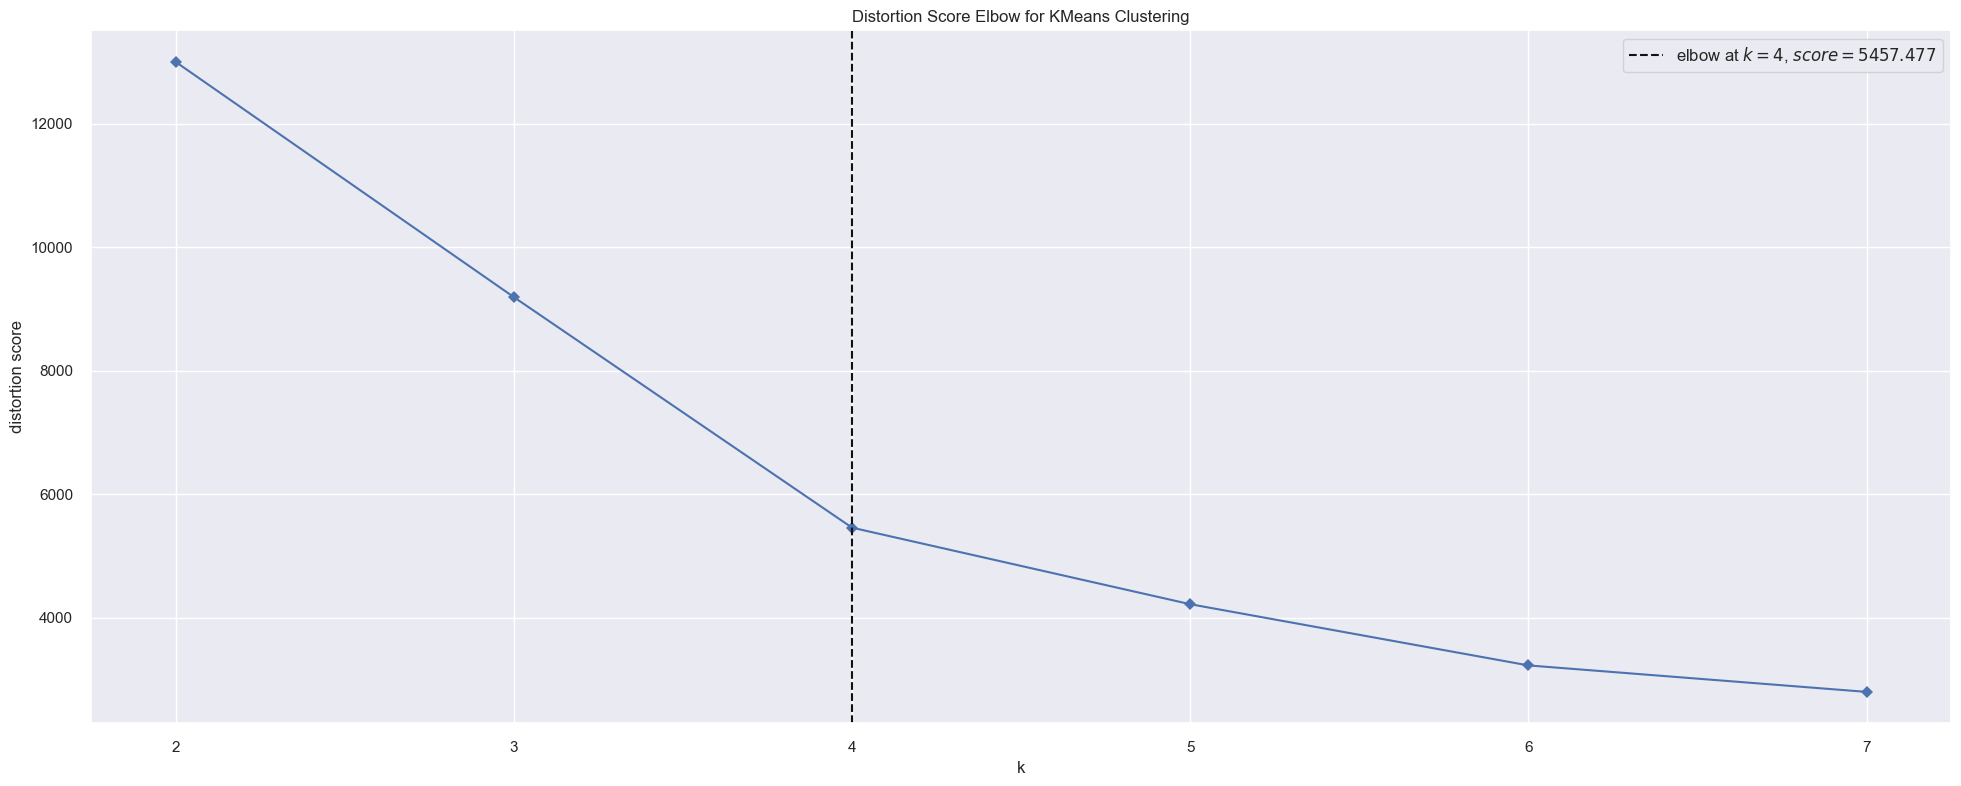

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

clusters = np.arange(2, 8)

kmeans_yellow = KElbowVisualizer(KMeans(), k=clusters, timings=False)
kmeans_yellow.fit(X)

kmeans_yellow.show();

### 7.2 Silhouette Score

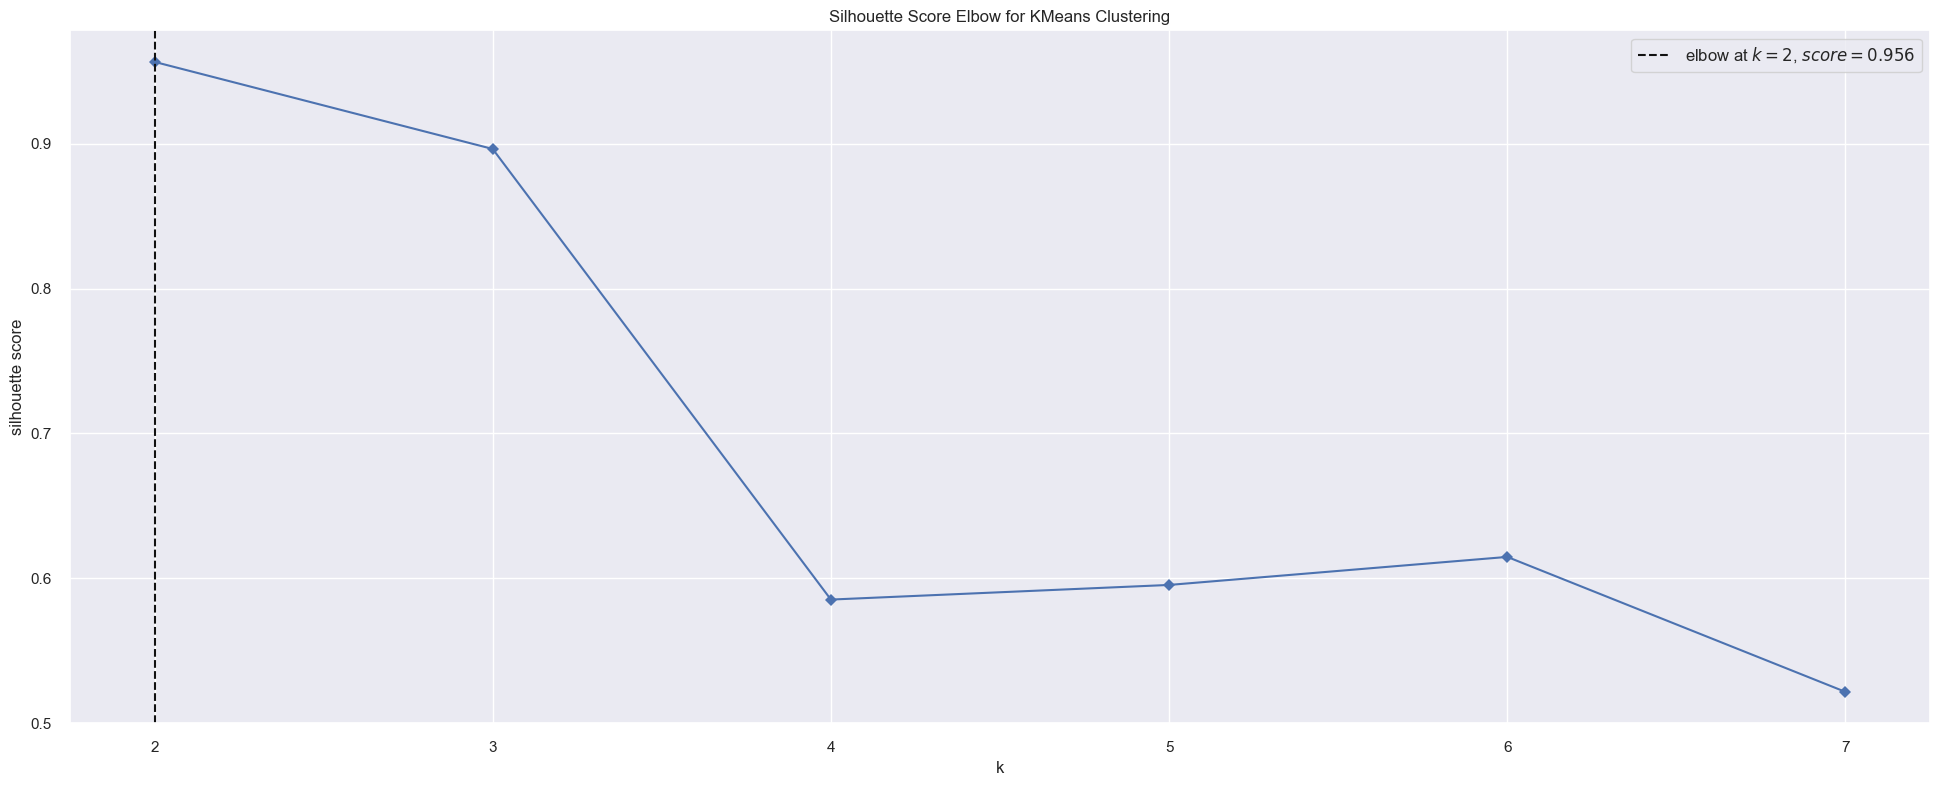

In [ ]:
kmeans_yellow = KElbowVisualizer(KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans_yellow.fit(X)

kmeans_yellow.show();

### 7.3 Silhouette Analysis

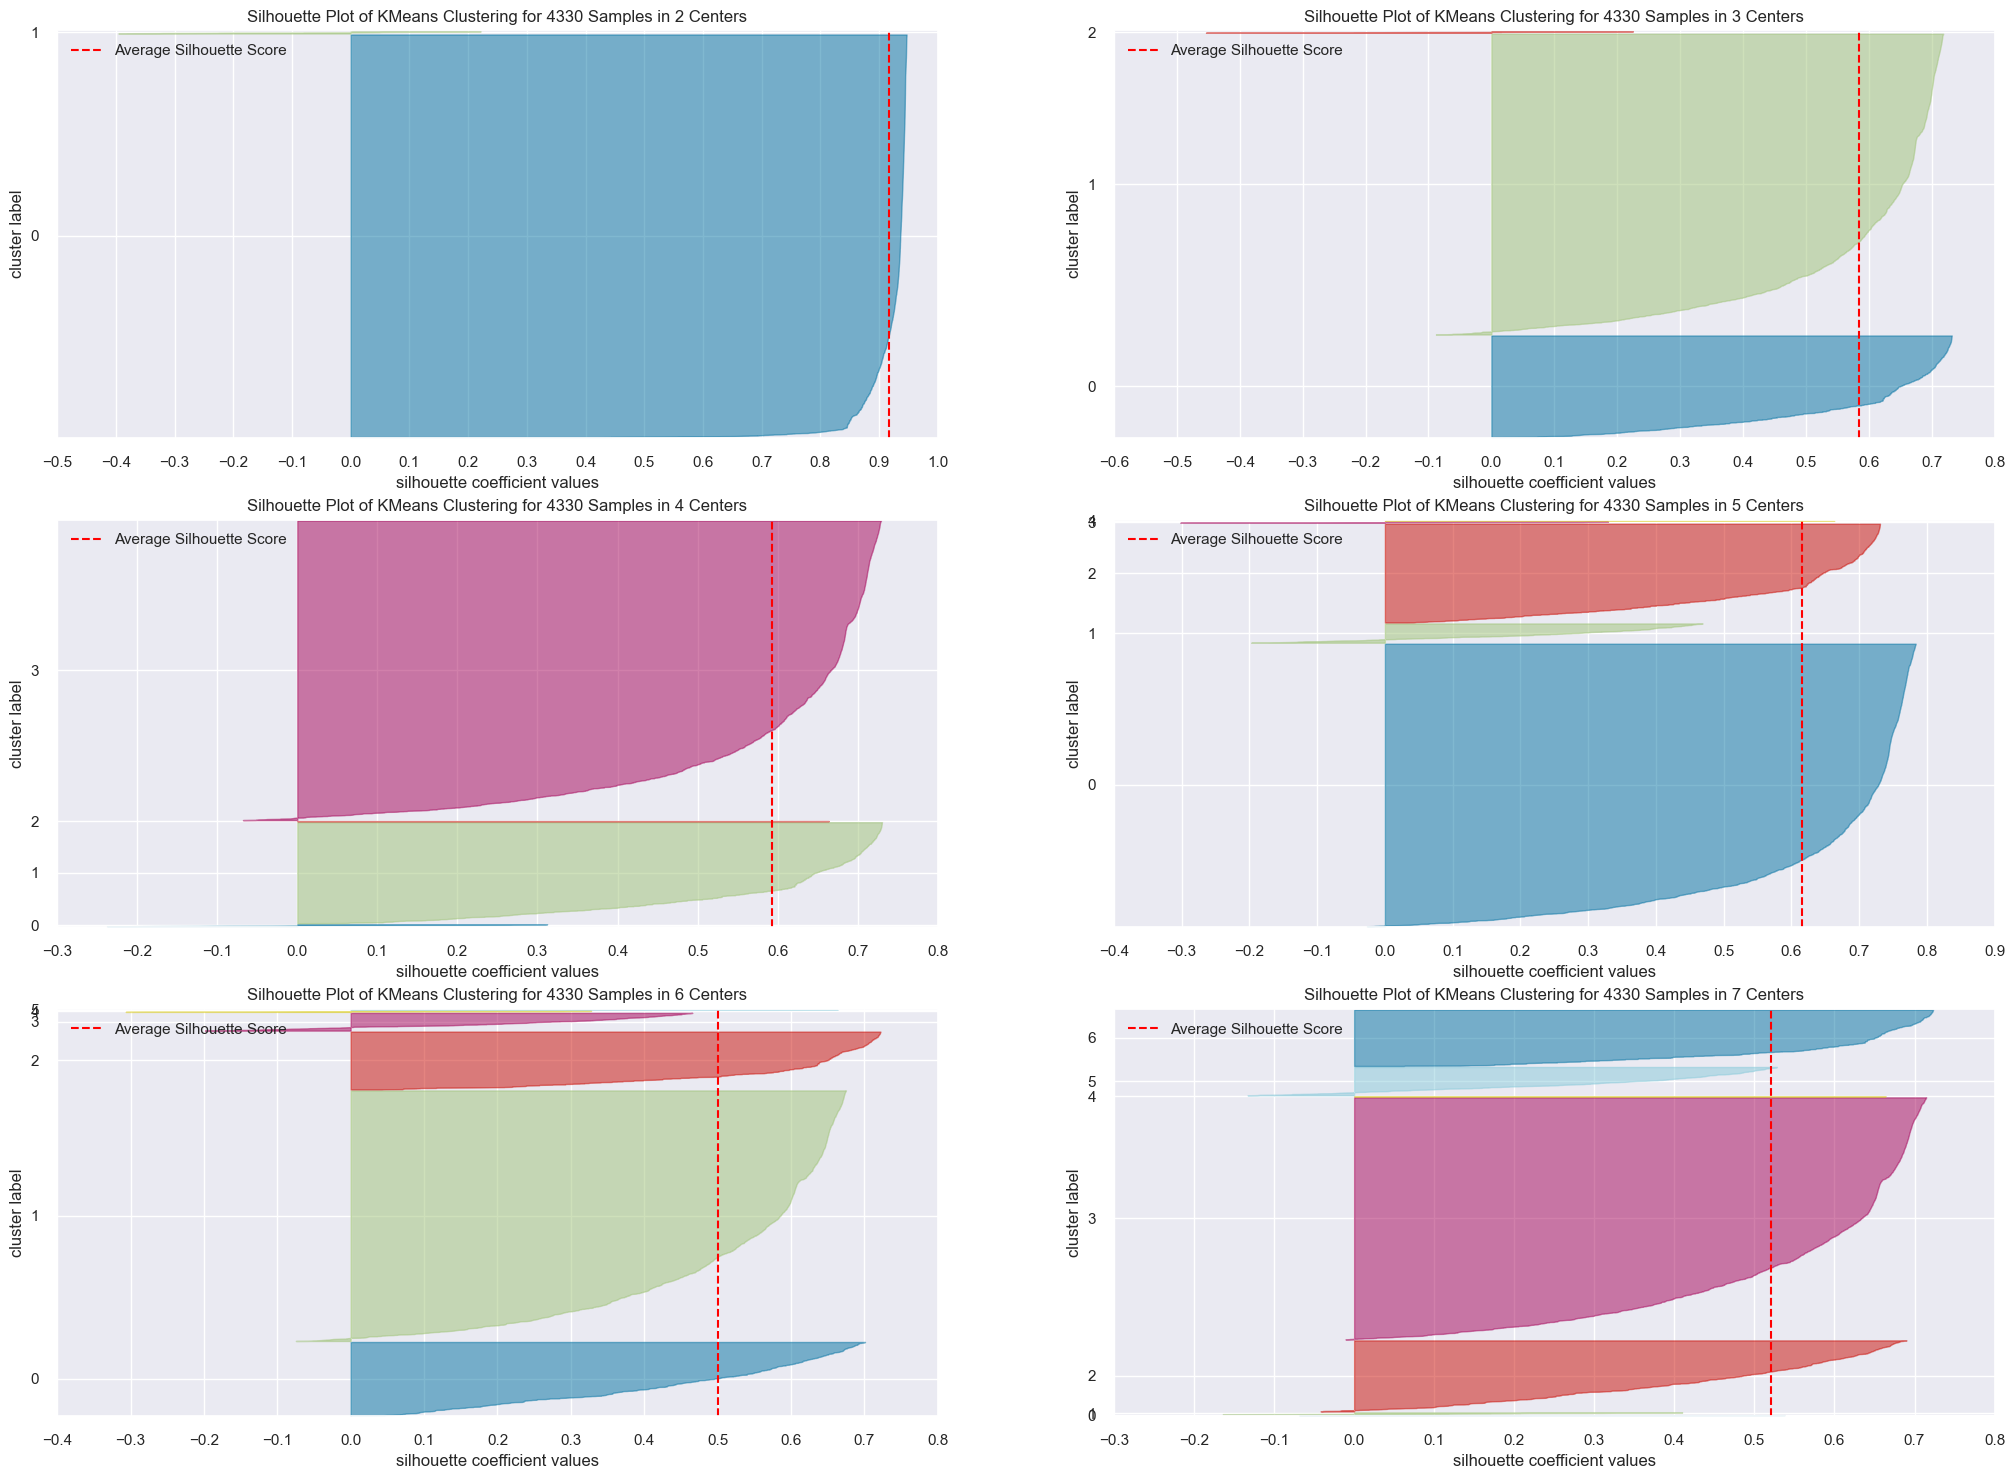

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 18))

for k, ax in zip(clusters, axes.ravel()):

    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)

    visualizer = SilhouetteVisualizer(estimator=km, colors='yellowbrick', ax=ax)
    visualizer.fit(X)
    
    visualizer.finalize();


## <font color="blue">8.0 Model Training </font>

### 8.1 K-Means

In [ ]:
# model definition
k_best = 3
kmeans = KMeans(init='random', n_clusters=k_best, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(X.values)

# clustering
labels = kmeans.labels_

### 8.2 Cluster Validation

In [ ]:
# WCSS (Within-Cluster Sum of Square)
print('WCSS value\t: {}'.format(kmeans.inertia_))

# SS (Silhouette Score)
ss_value = silhouette_score(X, labels, metric='euclidean')
print('SS value\t: {}'.format(ss_value))

WCSS value	: 9312.908865814397
SS value	: 0.5842412872238946


## <font color="blue">9.0 Cluster Analysis </font>

In [ ]:
df9 = df6.copy()

df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,frequency,avg_ticket,cluster
0,17850,0.377193,2.791512,3.889210,-0.033940,0
1,13047,0.135388,-0.361004,0.620928,-0.033430,1
2,12583,0.524404,-0.899726,1.405316,-0.026624,1
3,13748,-0.120499,0.028072,0.098003,-0.023241,1
4,15100,-0.128592,2.402435,-0.163459,0.152443,0


### 9.1 Visualization Inspection

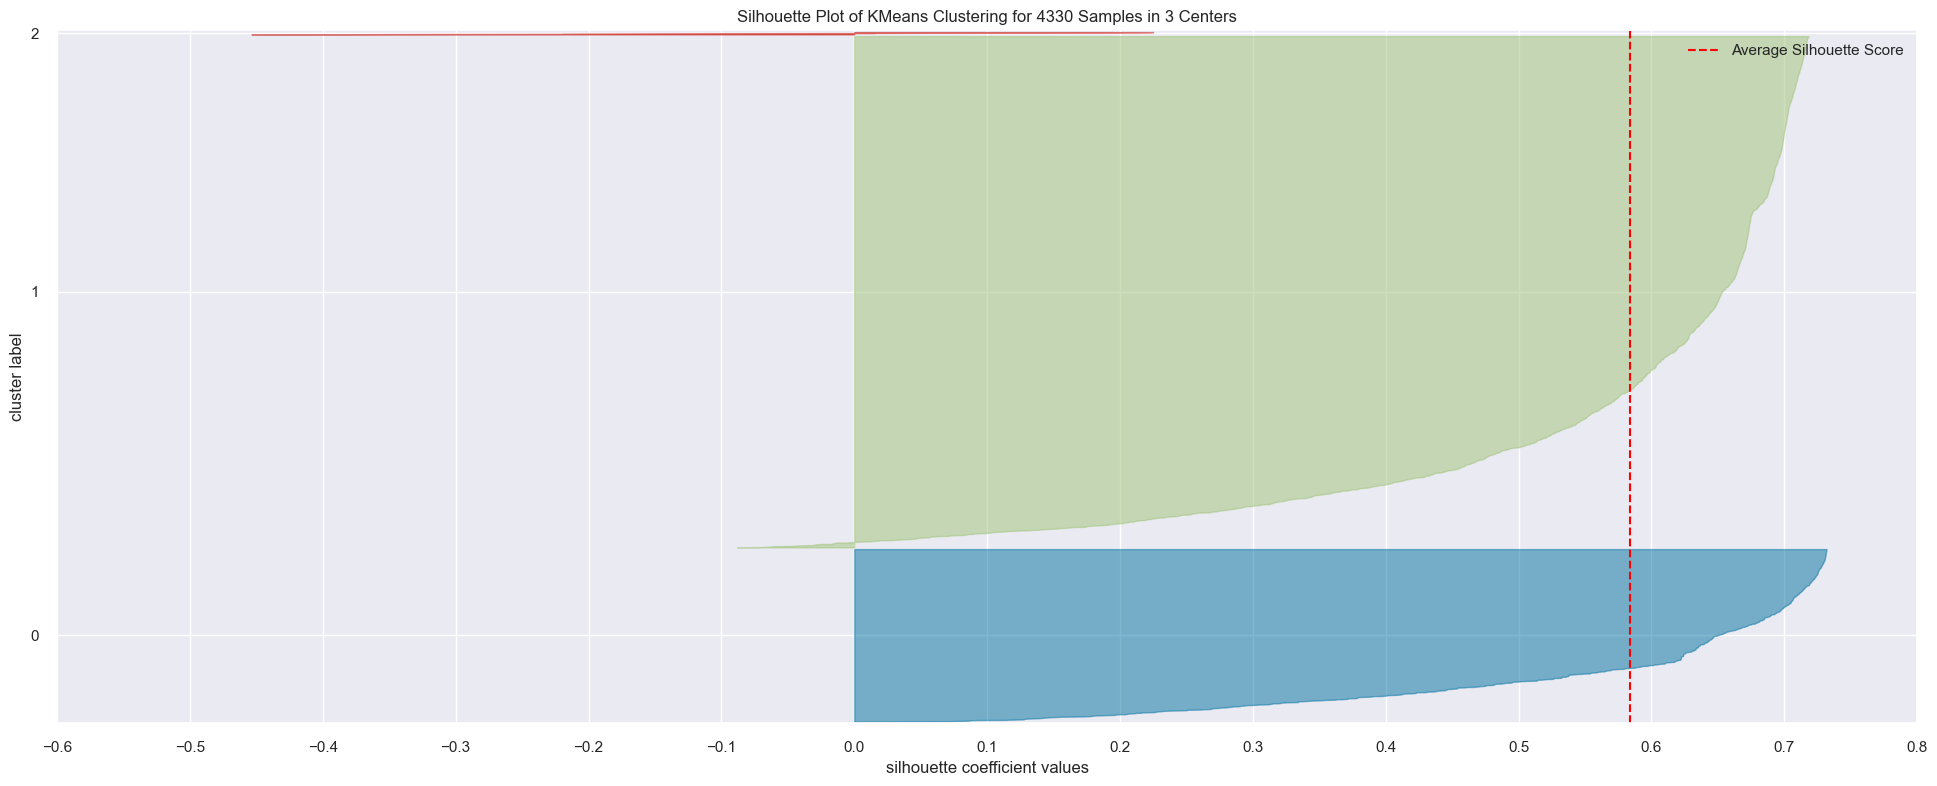

In [ ]:
visualizer = SilhouetteVisualizer(estimator=kmeans, colors='yellowbrick')
visualizer.fit(X.values)
visualizer.finalize();

### 9.2 2d plot

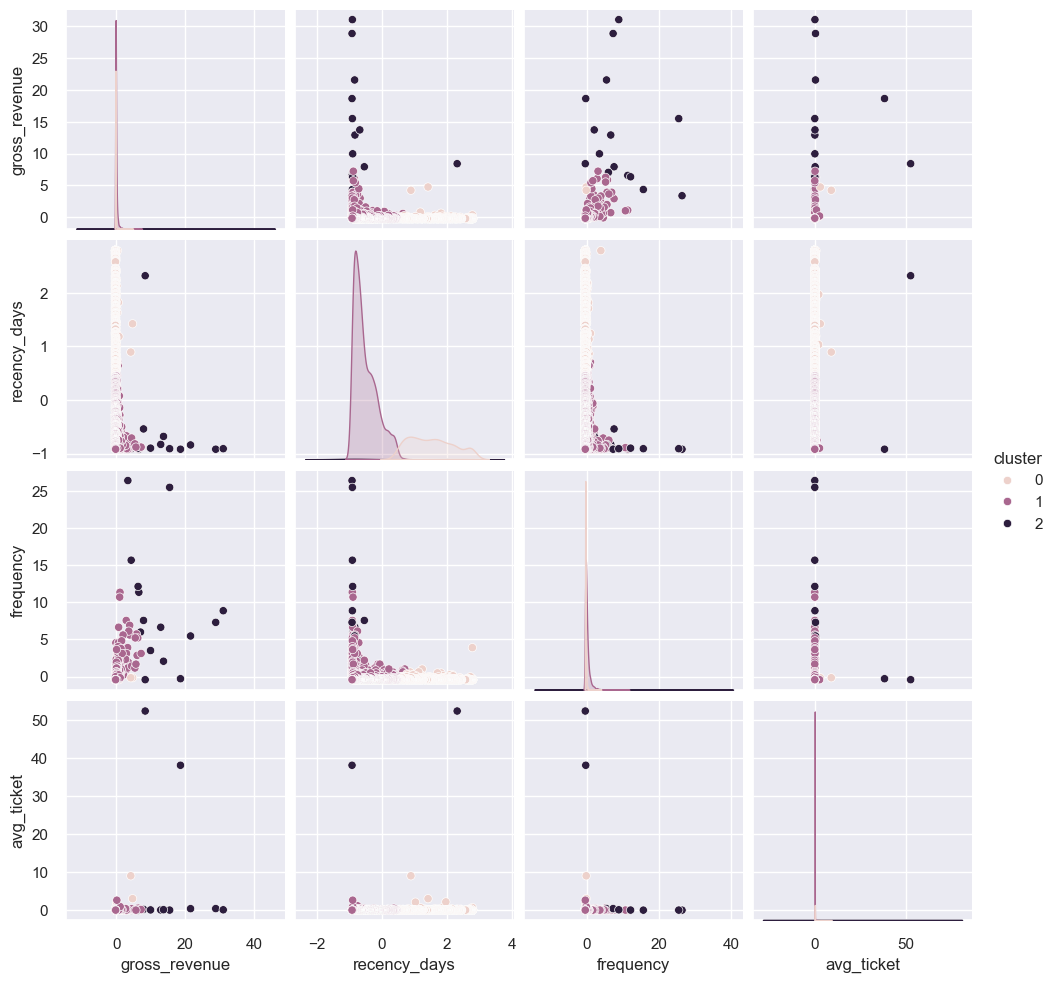

In [ ]:
df_viz = df9.drop(columns=['customer_id'], axis=1)

sns.pairplot(df_viz, hue='cluster');

### 9.3 UMAP - t-SNE

**PCA** -> Matriz, Espaço de distância

**UMAP, t-SNE (2009)** -> Manifold - Topologia

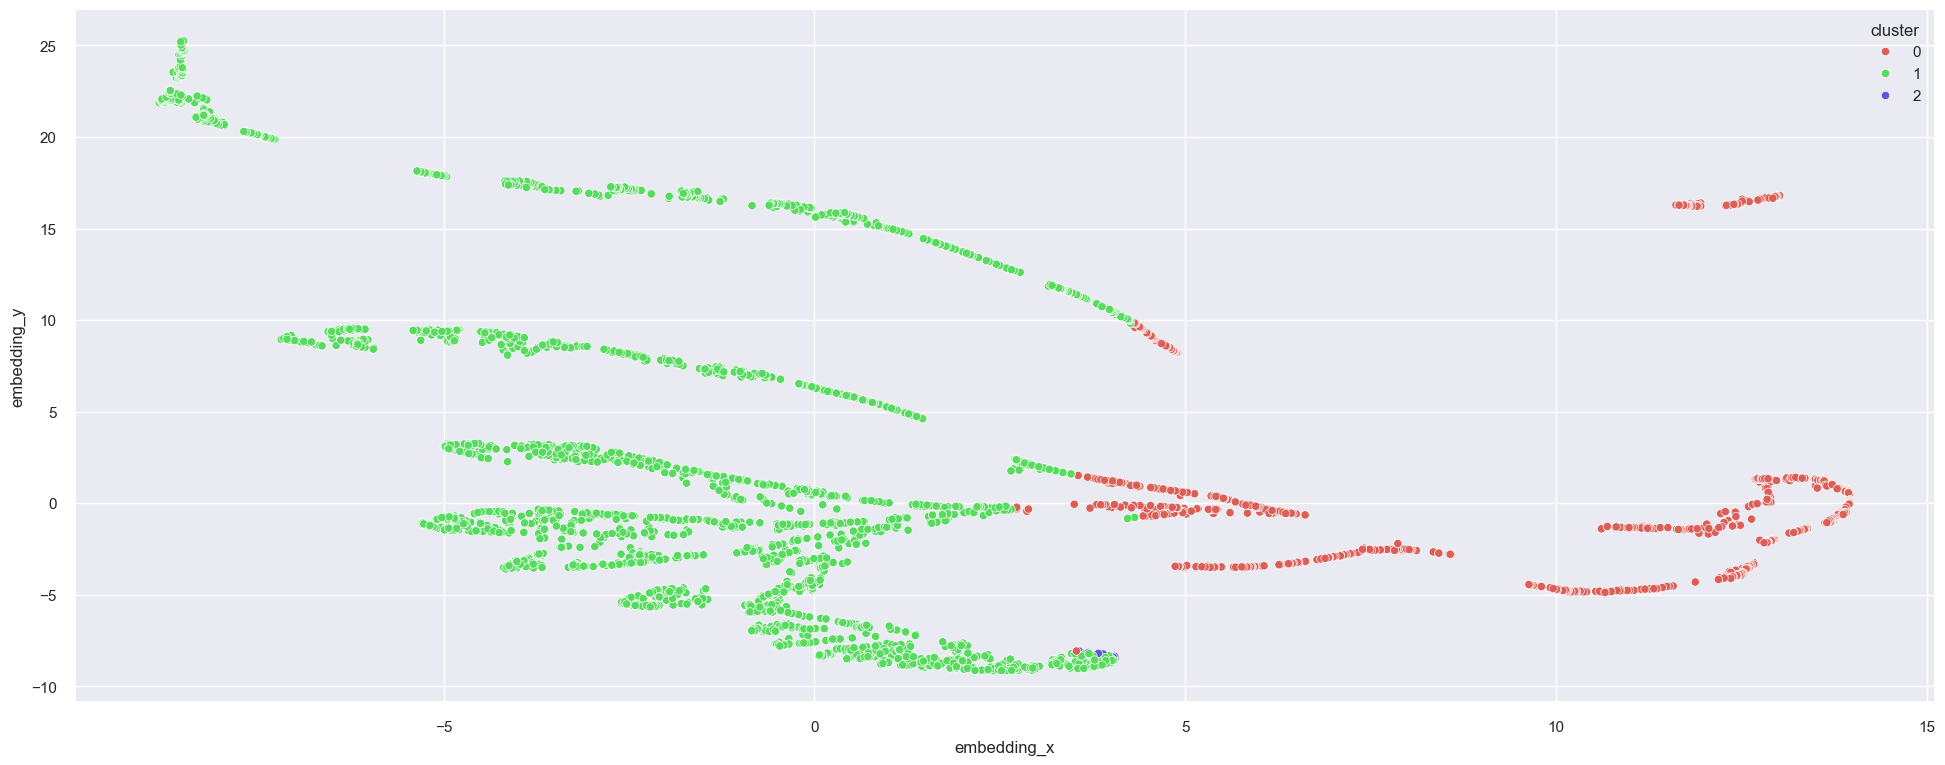

In [ ]:
reducer = umap.UMAP(n_neighbors=35)

embedding = reducer.fit_transform(X)

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette('hls', n_colors=k_best), data=df_viz);

/home/gustavo/.pyenv/versions/3.11.4/envs/ds-clusterizacao/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


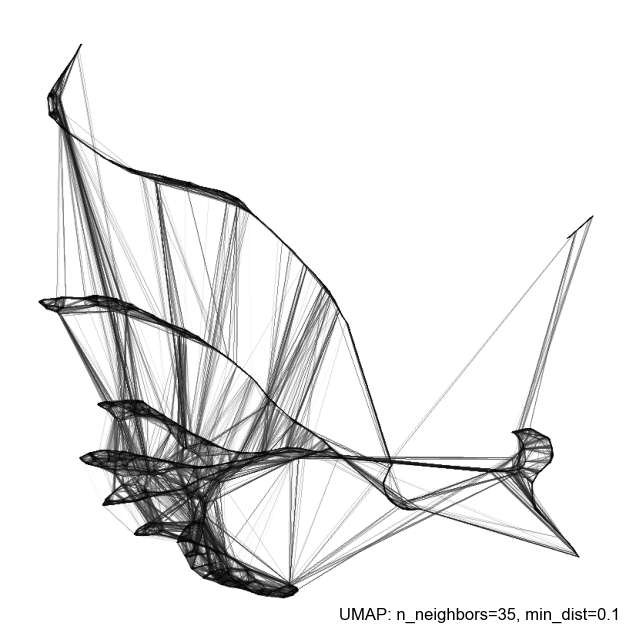

In [ ]:
import umap.plot

embedding_plot = reducer.fit(X)

umap.plot.connectivity(embedding_plot);

### 9.4 Cluster Profile

In [ ]:
df9.head()

,customer_id,gross_revenue,recency_days,frequency,avg_ticket,cluster
0,17850,0.377193,2.791512,3.889210,-0.033940,0
1,13047,0.135388,-0.361004,0.620928,-0.033430,1
2,12583,0.524404,-0.899726,1.405316,-0.026624,1
3,13748,-0.120499,0.028072,0.098003,-0.023241,1
4,15100,-0.128592,2.402435,-0.163459,0.152443,0


In [ ]:
# Number of customers
df_cluster = ( df9[['customer_id', 'cluster']]
                .groupby('cluster')
                .count()
                .reset_index()

        ).rename(columns={'customer_id': 'customers'})

df_cluster['perc_customer'] = 100 * df_cluster['customers'] / df_cluster['customers'].sum()

# Avg gross revenue
df_gross_revenue = ( df9[['gross_revenue', 'cluster']]
                        .groupby('cluster')
                        .mean()
                        .reset_index()
            )

df_cluster = pd.merge(left=df_cluster, right=df_gross_revenue, how='left', on='cluster')


# Avg recency days
df_recency = ( df9[['recency_days', 'cluster']]
                        .groupby('cluster')
                        .mean()
                        .reset_index()
            )

df_cluster = pd.merge(left=df_cluster, right=df_recency, how='left', on='cluster')


# Avg frequency
df_frequency = ( df9[['frequency', 'cluster']]
                        .groupby('cluster')
                        .mean()
                        .reset_index()
            )

df_cluster = pd.merge(left=df_cluster, right=df_frequency, how='left', on='cluster')


df_ticket = ( df9[['avg_ticket', 'cluster']]
                        .groupby('cluster')
                        .mean()
                        .reset_index()
            )

df_cluster = pd.merge(left=df_cluster, right=df_ticket, how='left', on='cluster')


df_cluster

,cluster,customers,perc_customer,gross_revenue,recency_days,frequency,avg_ticket
0,0,1090,25.17321,-0.164687,1.534953,-0.350561,-0.008775
1,1,3225,74.48037,-0.005222,-0.515794,0.075830,-0.025419
2,2,15,0.34642,13.090020,-0.644332,9.170754,6.102811


**Cluster 01: (Candidato a Insider)**
- Número de customers: 
- Recência média: x dias
- Compras em média: x compras
- Receita média: $


**Cluster 02:**
- Número de customers:
- Recência média: x dias
- Compras em média: x compras
- Receita média: $


**Cluster 03:**
- Número de customers:
- Recência média: x dias
- Compras em média: x compras
- Receita média: $

## <font color="blue">10.0 Deploy to Production </font>